In [8]:
.libPaths()

[1] "/Users/zimine/anaconda3/lib/R/library"

# Chapter 1 Portfolio Basics

## Course overview
* ch1 Porfolio weights and returns
* ch2 Portfolio performance evaluation
* ch3 Drivers of Performance
* ch4 Portofolio Optimization

## To avoid large losses
* carefully select deversified portfolios
* backtest portfolio strategy
* constant monitoring of portfolio performance

## Usual tasks
* put research in selecting instruments and weights to keep an expected return at a constrained level   to reduce the risk   OR to keep the risk and increase the expected return

In [9]:
require(quantmod)

[1] "PEP" "KO"

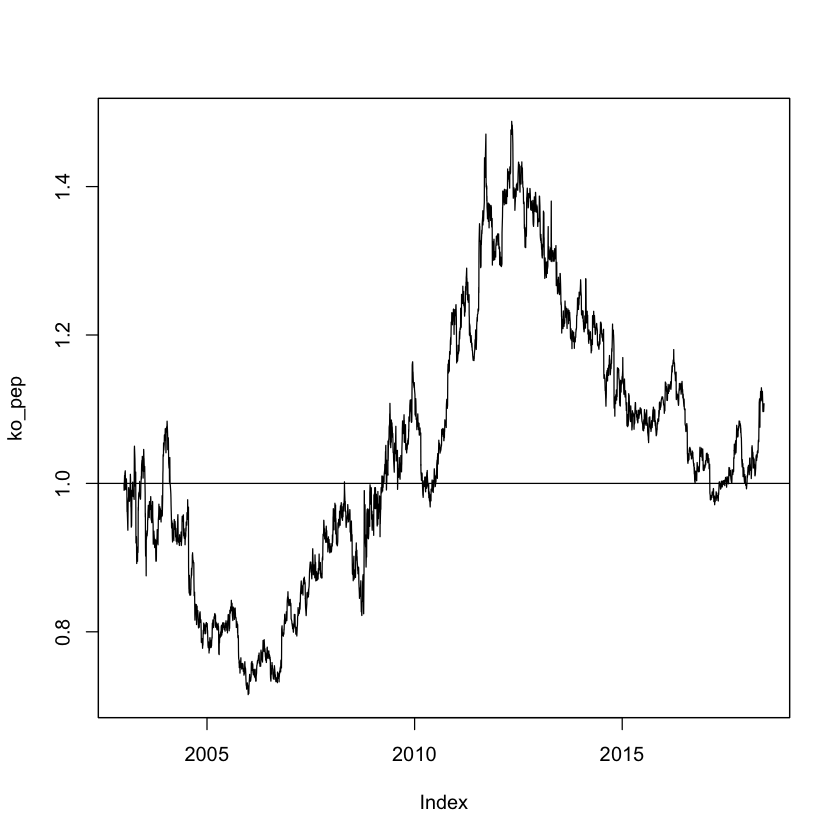

In [10]:
## chap1  feel the data

##first example show how two companies (pepsico and coca-kola) selling similar products
# can have a evolving relative value
tkr<-new.env()
getSymbols(c('PEP','KO'), env=tkr, src="yahoo", from=as.Date("2003-01-02") )
ko<-Ad(tkr$KO)  # get ticker adjusted value
pep<-Ad(tkr$PEP)
## we are computing the 2 securities ratio
ko<-ko/as.numeric(ko[1]) #normalize by first element
pep<-pep/as.numeric(pep[1])
ko_pep <-ko/pep #ratio of two tickers
plot.zoo(ko_pep) #plot the ratio
abline(h=1.0)


![title](img/invest_decide.png)

## Portfolio weights
For N investments $V_1,..V_N$ the i_th weight $w_i = \frac{V_i}{\sum_i^N V_i}$

### analyzing values of portfolio weights reveal the investment bets

In [11]:
#simple R to compute weights given amounts for each asset class 
# Define the vector values
values <- c(4000,4000,2000)
names(values) <- c("Equities", "Bonds", "Commodities")
# Define the vector weights
weights <- values/sum(values)

# Print the resulting weights Sum of weights always yields to 1
print(weights)


   Equities       Bonds Commodities 
        0.4         0.4         0.2 


![title](img/alloc_strat.png)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001442 0.003389 0.018027 0.100000 0.115374 0.576868 

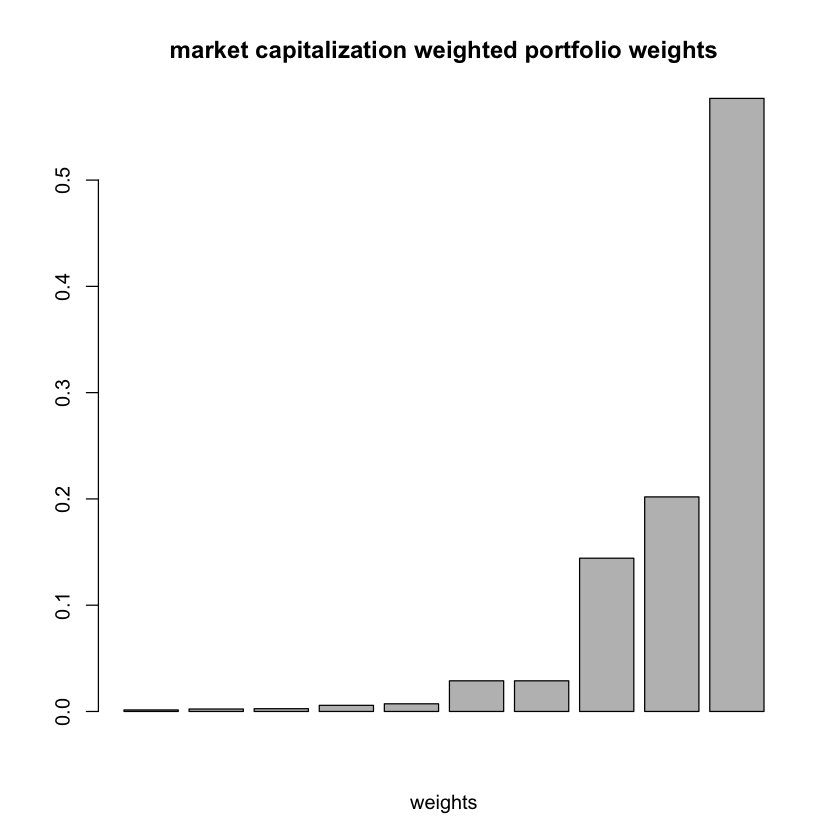

In [12]:
#a simple example of market capitalization weighted portfolio
#using 10 market capitalisations in millions USD
# Define marketcaps
marketcaps<-c(5, 8, 9, 20, 25, 100, 100, 500, 700, 2000) 
  
# Compute the weights
weights <- marketcaps/sum(marketcaps)
  
# Inspect summary statistics
summary(weights)
  
# Create a barplot of weights
  barplot(weights,main="market capitalization weighted portfolio weights" , xlab="weights")
# the bigget weigth comes for a biggest marketcap

# Porfolio Returns
### return is a relative change  in value
$$ R = \frac{EMV-BMV}{BMV} $$
### 3 steps
* initial portfolio value = sum of N investments at initial date
* final portfolio value = sum of N investment values at final date
* $$  R=\frac{finalValue - initialValue}{initialValue} $$


![title](img/ex_2assets_ret_1.png)

# Portfolio return also
$$PortfolioReturn = w_1 R_1 + w_2 R_2+..+w_n R_n$$
where  
$$w_i=\frac{Asset_i}{\sum_i^N Asset_i}$$
and 
$$ R_i =\frac{EMV(Asset_i)-BMV(Asset_i)}{BMV(Asset_i)}$$





In [13]:
## so the previous example using the sum of weighted returns formula
bmv <- c(200,300)
emv <- c(180,330)
wgh <- bmv/sum(bmv)
ret <- (emv-bmv)/bmv
print(wgh) #weights
print(ret) #2 asset individual returns
r_prtf <- sum(wgh*ret) #portfolio return
print(r_prtf)

[1] 0.4 0.6
[1] -0.1  0.1
[1] 0.02




## Portfolio Mean returns over i periods

$$ \mu_{arith} = \frac{\sum{r_i}}{n} $$
$$ \mu_{geom} = \left(\prod_{i=1}^n(1+r_i)\right)^\frac{1}{n} -1$$

### Assymetric impact of gains and losses

Arithmetic return does not account the assymetry of returns, geometric return does!

In [50]:
## arithmetic return vs geometric return. 
#spoil: they are not the same
#example same, +- return over two periods
arith_r <- (0.25 + (-0.25))

geom_r <- ((1+0.25)*(1-0.25)) -1

print(paste("arithmetic:", arith_r, "geometric:", geom_r))

fv_arith <- 1000*(1+arith_r)
fv_geom <- 1000*(1+geom_r)
print(paste("arithmetic return after 2 periods with opposed returns of 25% :money the same", fv_arith))
print(paste("geometric return after 2 periods with opposed returns of 25% :money lost", fv_geom))



[1] "arithmetic: 0 geometric: -0.0625"
[1] "arithmetic return after 2 periods with opposed returns of 25% :money the same 1000"
[1] "geometric return after 2 periods with opposed returns of 25% :money lost 937.5"


### Q. after a loss of 50% in 1 period what should be a return in the next period to pare a loss?

In [15]:
#(1-0.5)*(1+x) = 1
#1+x-0.5-0.5x=1
#0.5x=0.5
#x=1
## i.e. you need a 100% return to erase a previous 50% loss 

## The practioner's challenge
* in practice, time series of portfolio returns
* longer history means more info on portfolio available

### use PerformanceAnalytics Package

### Dynamics of Porfolio Weights  2 approaches
* Set initial weights  and do not intervene
* actively change portfolio weights. (**Rebalancing**)



In [73]:
#first usage of PortfolioAnalytics Return.Calculate
require(PerformanceAnalytics)
#tkr env is present
getSymbols(c('AAPL','MSFT'), env=tkr, src="yahoo", from=as.Date("2006-01-01"),to=as.Date("2018-05-31"))
prices<-cbind(Ad(tkr$AAPL), Ad(tkr$MSFT))
returns<-Return.calculate(prices) #computes returns from prices  by portfolioAnalytics
#same result with explicit formula using function lag()
returns_bis <- prices / lag(prices) -1

returns<-returns[-1,] #remove first NA line
returns_bis<-returns_bis[-1,] #remove first NA line
#print head of returns
head(returns,2)

#plot.zoo(prices)
print('check start and end of prices')
head(prices,1)
tail(prices,2)

[1] "AAPL" "MSFT"

           AAPL.Adjusted MSFT.Adjusted
2006-01-04   0.002942859  0.0048437510
2006-01-05  -0.007869873  0.0007416231

[1] "check start and end of prices"


           AAPL.Adjusted MSFT.Adjusted
2006-01-03      7.201161      20.16598

           AAPL.Adjusted MSFT.Adjusted
2018-05-29         187.9         98.01
2018-05-30         187.5         98.95

[1] "observe the volatility of monthly rebalanced portfolio is lower than buy and hold"


[1] 0.01716307

[1] 0.01582375

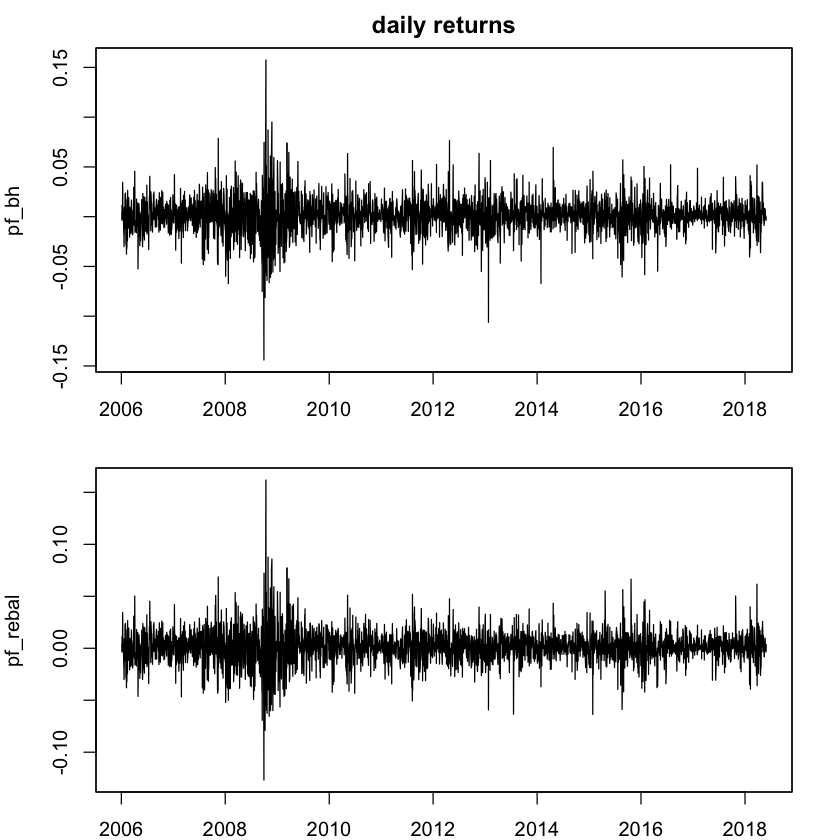

In [66]:
##first usage of Return.portfolio
#create initial equal weights for 2-asset portfolio
eq_weights <- c(0.5, 0.5)
# Create a portfolio using buy and hold (weights fixed, no rebalancing)
pf_bh <- Return.portfolio(R =returns, weights =eq_weights)
# Create a portfolio rebalancing monthly 
pf_rebal <- Return.portfolio(R=returns, weights=eq_weights,rebalance_on="months")


# Plot the time-series of daily returns
par(mfrow = c(2, 1), mar = c(2, 4, 2, 2))
plot.zoo(pf_bh, main="daily returns")
plot.zoo(pf_rebal)

print('observe the volatility of monthly rebalanced portfolio is lower than buy and hold')
sd(pf_bh)
sd(pf_rebal)



           AAPL.Adjusted
2018-05-29     0.8429833
2018-05-30     0.8414317

           AAPL.Adjusted
2018-05-29     0.5202438
2018-05-30     0.5173289

[1] "we observe that Buy and hold strat weights favor AAPL (which grew more) ; rebalanced weights are kept to be around 0.5"


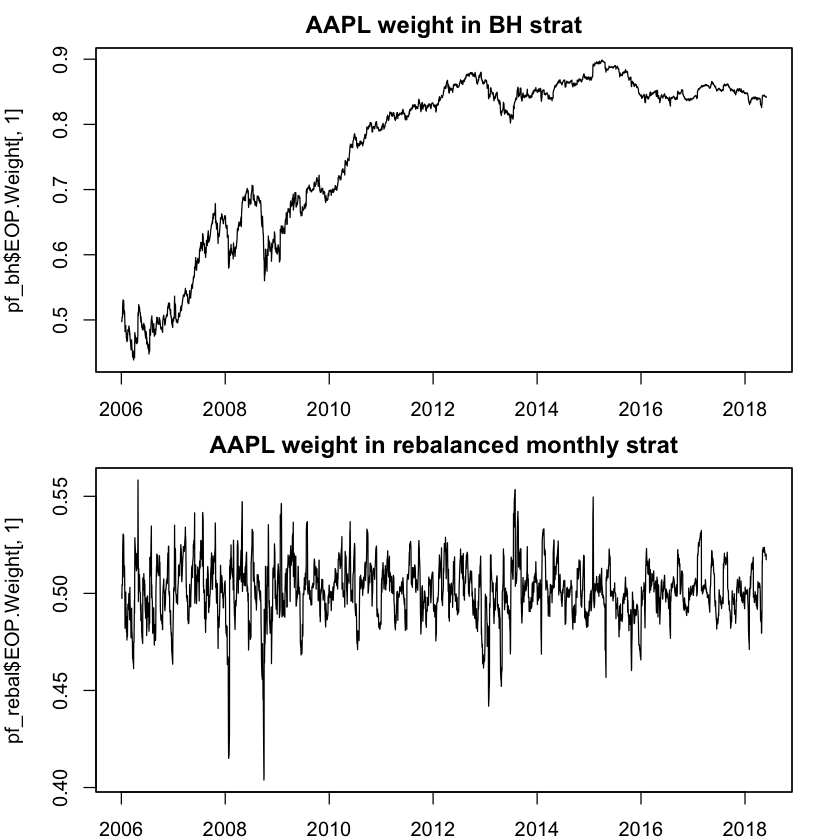

In [74]:
# the time series of weights

#getting portfolio returns as well as beginning of period (bop), ending of period (eop) weights 
pf_bh <- Return.portfolio(R =returns, weights =eq_weights, verbose=TRUE)
pf_rebal <- Return.portfolio(R=returns, weights=eq_weights,rebalance_on="months",verbose=TRUE)

## see apple eop period weighgs for buy&hold and rebalanced portfolio

tail(pf_bh$EOP.Weight$AAPL.Adjusted,2)
tail(pf_rebal$EOP.Weight$AAPL.Adjusted,2)
print('we observe that Buy and hold strat weights favor AAPL (which grew more) ; rebalanced weights are kept to be around 0.5')
##plot these end of period weights
par(mfrow = c(2, 1), mar=c(2, 4, 2, 2))
plot.zoo(pf_bh$EOP.Weight[,1], main='AAPL weight in BH strat')
#as we can see rebalanced weight oscilates around 0.5 and b&h  grows higher because AAPL relatively outperforms MSFT
plot.zoo(pf_rebal$EOP.Weight[,1], main='AAPL weight in rebalanced monthly strat')

# Chapter 2 Dimensions of portfolio performance
### risk 
### reward

#### Portfolio mean return
#### Portfolio volatility
**assume a sample of T portfolio return observation**
$$ R_1,R_2,\dots,R_T$$

* **Arithmetic** mean return
$$ \hat{\mu} = \frac{R_1+R_2+..+R_T}{T}$$

* **Geometric** mean return
$$ \mu_{geom} = \left(\prod_{i=1}^T(1+r_i)\right)^\frac{1}{T} -1$$

Returns can deviate from average return **De-meaned return** $R_i-\hat{\mu}$

* Variance of the portfolio
$$ \hat{\sigma}^2= \frac{\sum_{j=1}^T (R_j-\hat{\mu})^2}{T-1}$$
* **volatility** of portfolio is a square root of its variance


### Arithmetic return mean vs geometric return mean
* Arithmetic mean return does not reflect  non zero contribution of +r followed by -r
* **Geometric** mean
$$ \hat{R} = \left[(1+R_1)*..*(1+R_T)\right]^{\frac{1}{T}} - 1 $$
e.g 
$$ [(1+0.5)*(1-0.5)]^{\frac{1}{2}} -1 \neq 0 = -0.134 $$


In [75]:
## Exploring the monthly S&P 500 returns

getSymbols("^GSPC", env=tkr, src = "yahoo", from = as.Date("1985-12-31") ) #from 1986 to now
sp500d <- Ad(tkr$GSPC)
sp500_monthly<-to.monthly(sp500d)
#head(sp500_monthly) # print head of monthly closes
sp500_returns <- Return.calculate(Cl(sp500_monthly))
sp500_returns <- sp500_returns[-1,] #get rid of first na value
##print returns in  calendar format
table.CalendarReturns(sp500_returns)

[1] "GSPC"

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,sp500d.Close
1986,0.2,7.1,5.3,-1.4,5.0,1.4,-5.9,7.1,-8.5,5.5,2.1,-2.8,14.6
1987,13.2,3.7,2.6,-1.1,0.6,4.8,4.8,3.5,-2.4,-21.8,-8.5,7.3,2.0
1988,4.0,4.2,-3.3,0.9,0.3,4.3,-0.5,-3.9,4.0,2.6,-1.9,1.5,12.4
1989,7.1,-2.9,2.1,5.0,3.5,-0.8,8.8,1.6,-0.7,-2.5,1.7,2.1,27.3
1990,-6.9,0.9,2.4,-2.7,9.2,-0.9,-0.5,-9.4,-5.1,-0.7,6.0,2.5,-6.6
1991,4.2,6.7,2.2,0.0,3.9,-4.8,4.5,2.0,-1.9,1.2,-4.4,11.2,26.3
1992,-2.0,1.0,-2.2,2.8,0.1,-1.7,3.9,-2.4,0.9,0.2,3.0,1.0,4.5
1993,0.7,1.0,1.9,-2.5,2.3,0.1,-0.5,3.4,-1.0,1.9,-1.3,1.0,7.1
1994,3.3,-3.0,-4.6,1.2,1.2,-2.7,3.1,3.8,-2.7,2.1,-4.0,1.2,-1.5
1995,2.4,3.6,2.7,2.8,3.6,2.1,3.2,0.0,4.0,-0.5,4.1,1.7,34.1


In [118]:
#returns can be calculated using the lag function which changes the index by 1
#i.e.
sp500_returns_same <- Cl(sp500_monthly) / lag(Cl(sp500_monthly)) -1
sp500_returns_same<-sp500_returns_same[-1,] #get rid of fist NA
head(sp500_returns)
head(sp500_returns_same)



         sp500d.Close
Jan 1986  0.002366528
Feb 1986  0.071489277
Mar 1986  0.052793919
Apr 1986 -0.014148138
May 1986  0.050229288
Jun 1986  0.014109521

         sp500d.Close
Jan 1986  0.002366528
Feb 1986  0.071489277
Mar 1986  0.052793919
Apr 1986 -0.014148138
May 1986  0.050229288
Jun 1986  0.014109521

An ‘xts’ object on Jan 1986/Jun 2018 containing:
  Data: num [1:390, 1] 0.00237 0.07149 0.05279 -0.01415 0.05023 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "sp500d.Close"
  Indexed by objects of class: [yearmon] TZ: UTC
  xts Attributes:  
List of 3
 $ src     : chr "yahoo"
 $ updated : POSIXct[1:1], format: "2018-06-02 16:40:12"
 $ ret_type: chr "discrete"


### Basic Statistics of return series 

In [76]:
## The montly mean and volatility 

#mean monthly return
paste("Mean mhth return", mean(sp500_returns))
#geometric mean of monthly returns
paste("Geom mean return", mean.geometric(sp500_returns))
#standard deviation of returns
paste("Standard deviation or volatility of month return",sd(sp500_returns))

[1] "Mean mhth return 0.00751433872043259"

[1] "Geom mean return 0.00658714800582483"

[1] "Standard deviation or volatility of month return 0.0426850583940785"

### Performance Descriptive statistics
**Sharpe Ratio = slope adjusted reward to risk**
$$ Sharpe=\frac{R_\Pi-\mu_{riskless}}{\sigma_\Pi} $$


**Annualization of monthly performance**
* **Arithmentic mean**: montly_mean * 12
* **Geometic mean** (T is a number of monthly observations: 
$$  \left[(1+R_1)*..*(1+R_T)\right]^{\frac{12}{T}} - 1  $$
* **Volatility**: monthly_volatility * sqrt(12)
* **Sharpe**:  monthly_sharpe * sqrt(12)

**Example in R below**

In [125]:
## performance descriptive basic statistics 8 monthly returns
sigd <-4
returns_sample <- c(-0.02, 0.0, 0.0, 0.06, 0.02, 0.03, 0.01, 0.04)
r_riskfree <- 0.004
mu_arith <- mean(returns_sample)
mu_geom <- mean.geometric(returns_sample)
## same means but with explicit formulas
mu_arith_explicit <- sum(returns_sample)/length(returns_sample)
mu_geom_explicit <- (prod(1+returns_sample))^(1/length(returns_sample)) -1

#volatility of return series
vol <- sd(returns_sample)   ##volatility (standard deviation) of rturns
vol_bis <- StdDev(returns_sample) #function from PerformanceAnalytics, 
                                  #better used for a matrix of returns by columns

paste('period return arith mean:', formatC(mu_arith,digits=sigd),
      "period return geometric mean:", formatC(mu_geom,digits=sigd),
     'volatility of monthly returns:', formatC(vol,digits=sigd) )


##sharpe
shrp <- (mu_arith - r_riskfree)/vol
paste('monthly returns sharpe:', formatC(shrp,digits=sigd))

##anunualization
mu_arith_annu <- mu_arith * 12
mu_geom_annu <- (prod(1+returns_sample))^(12/length(returns_sample)) -1
vol_annu <- vol * sqrt(12)
sharpe_annu <- shrp * sqrt(12)

print('annualization')
paste('arithmetic return annualized:', formatC(mu_arith_annu,digits=sigd),
      'geometric return annualized:', formatC(mu_geom_annu, digits=sigd),
     'volatility annualized', formatC(vol_annu,digits=sigd),
      'sharpe annualized', formatC(sharpe_annu,digits=sigd) )

print('using functions from PerformanceAnalytics')
Return.annualized(returns_sample,scale=12) #geometri mean return annualized
StdDev.annualized(returns_sample,scale=12)

[1] "period return arith mean: 0.0175 period return geometric mean: 0.01722 volatility of monthly returns: 0.0255"

[1] "monthly returns sharpe: 0.5295"

[1] "annualization"


[1] "arithmetic return annualized:  0.21 geometric return annualized: 0.2274 volatility annualized 0.08832 sharpe annualized 1.834"

[1] "using functions from PerformanceAnalytics"


[1] 0.2273999

[1] 0.08831761

[1] "DGS1MO"

Warning message in to.period(x, "months", indexAt = indexAt, name = name, ...):
“missing values removed from data”

[1] "exccess mean 0.00351773348129212"

[1] "sp500 mean 0.00477725062170745"

[1] "sharpe monthly sp500: 0.0868524056915526"

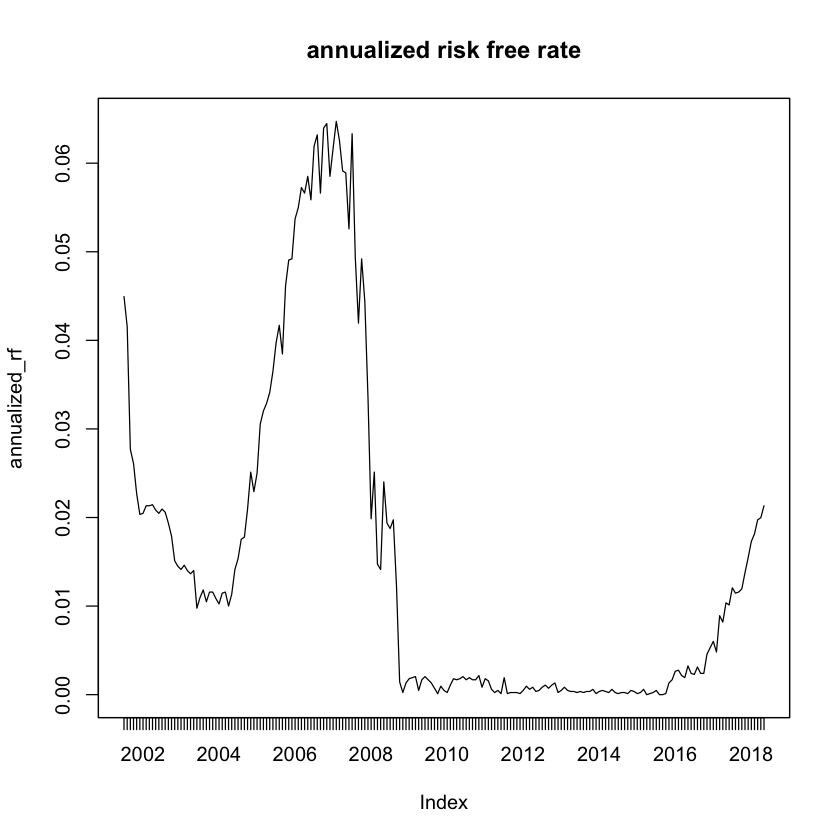

In [127]:
## Excess returns and the portfolio Sharpe ratio

## download data for risk free rate 1-mohth T-bills
options(download.file.method="wget")
getSymbols('DGS1MO', env=tkr,src='FRED', from=as.Date("1986-01-01"))
trf<-tkr$DGS1MO
##risk free rate (1-month treasury bill downloaded from fred)
rf<-Cl(to.monthly(trf))*0.001 # factor to match the rf data

#start sp500_returns from 2001-Jul the first month of rf
sp500_returns_a<-sp500_returns['2001-07::']

#compute annualized risk fr
annualized_rf <- (1 + rf)^12 - 1  # we have an xts with the same length as rf
# Plot the annualized risk free rate
plot.zoo(annualized_rf, main='annualized risk free rate')
# Compute the series of excess portfolio returns 
sp500_excess_a <- sp500_returns_a - rf  
#compare means
paste("exccess mean", mean(sp500_excess_a))
paste("sp500 mean", mean(sp500_returns_a))

#compute and print the Sharpe Ratio
sp500_sharpe <- mean(sp500_excess_a) / sd(sp500_returns_a) 
paste("sharpe monthly sp500:", sp500_sharpe)



In [129]:
## Rolling Annualized mean and volatility 


# Compute the annualized mean
Return.annualized(sp500_returns,scale=12) 
# Compute the annualized standard deviation
StdDev.annualized(sp500_returns, scale=12)


# Compute all of the above at once using table.AnnualizedReturns()
table.AnnualizedReturns(sp500_returns)

##the same sharpe using formulas
sp500_ret_annu <- prod(1+sp500_returns)^(12/nrow(sp500_returns)) -1 
sp500_stdev_annu <- sd(sp500_returns)*sqrt(12)
sp500_sharpe_annu <- sp500_ret_annu  / sp500_stdev_annu #asume r_riskfree= 0
paste('return geom annualized:',sp500_ret_annu )
paste('stdev annualized:', sp500_stdev_annu )
paste('sharpe annulized:',sp500_sharpe_annu )

,sp500d.Close
Annualized Return,0.08197337


,sp500d.Close
Annualized Standard Deviation,0.1478654


,sp500d.Close
Annualized Return,0.0820
Annualized Std Dev,0.1479
Annualized Sharpe (Rf=0%),0.5544


[1] "return geom annualized: 0.0819733725164473"

[1] "stdev annualized: 0.147865379725177"

[1] "sharpe annulized: 0.554378399249394"

                       sp500
Annualized Return 0.04840306
                                  sp500
Annualized Standard Deviation 0.1403045
                                      sp500
Annualized Sharpe Ratio (Rf=1.5%) 0.2352845


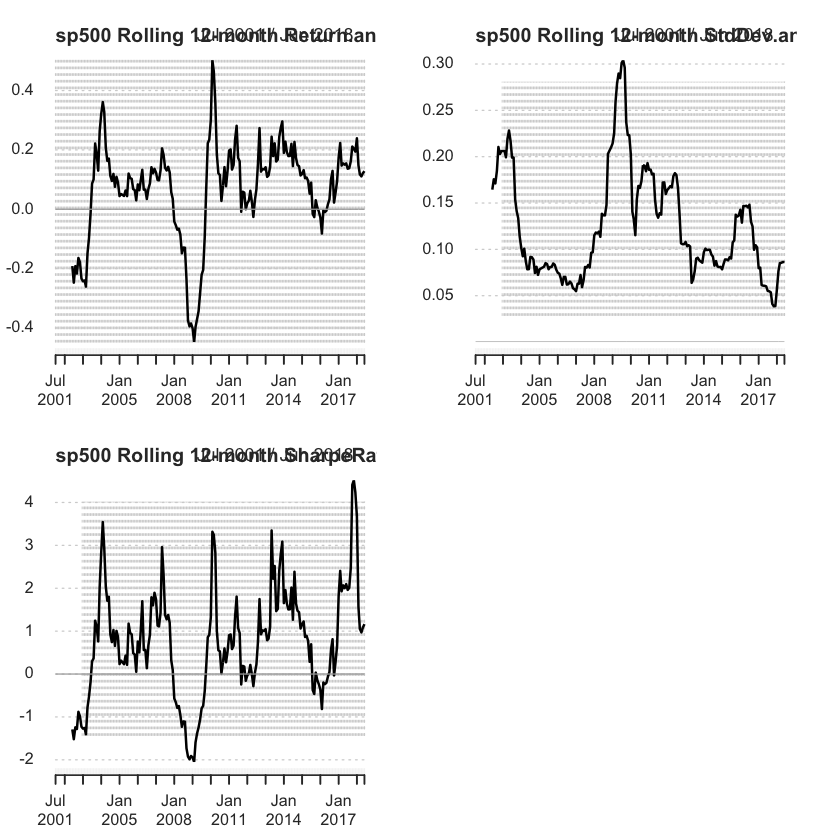

In [139]:
##Rolling annualized mean and volatility

# Calculate the mean, volatility, and sharpe ratio of sp500_returns

#using sp500_returns_a  to match date = '2001-07-31' to rf object
returns_ann<-Return.annualized(sp500_returns_a,scale=12)
sd_ann<-StdDev.annualized(sp500_returns_a,scale=12)

sharpe_ann<-SharpeRatio.annualized(sp500_returns_a,Rf=rf,scale=12) # rf = risk-free rate (1-mo T bill)

print(returns_ann)
print(sd_ann)
print(sharpe_ann)

colnames(sp500_returns_a)<-('sp500')

par(mfrow=c(2,2))
# Plotting the 12-month rolling annualized mean
chart.RollingPerformance(R = sp500_returns_a, width = 12
                        ,FUN = "Return.annualized", scale=12)
abline(h = returns_ann)

# Plotting the 12-month rolling annualized standard deviation
chart.RollingPerformance(R = sp500_returns_a, width = 12
                        ,FUN = "StdDev.annualized", scale=12)
abline(h = sd_ann)


# Plotting the 12-month rolling annualized Sharpe ratio
chart.RollingPerformance(R = sp500_returns_a, width = 12
                        ,FUN = "SharpeRatio.annualized", Rf=rf,scale=12)
abline(h = sharpe_ann)



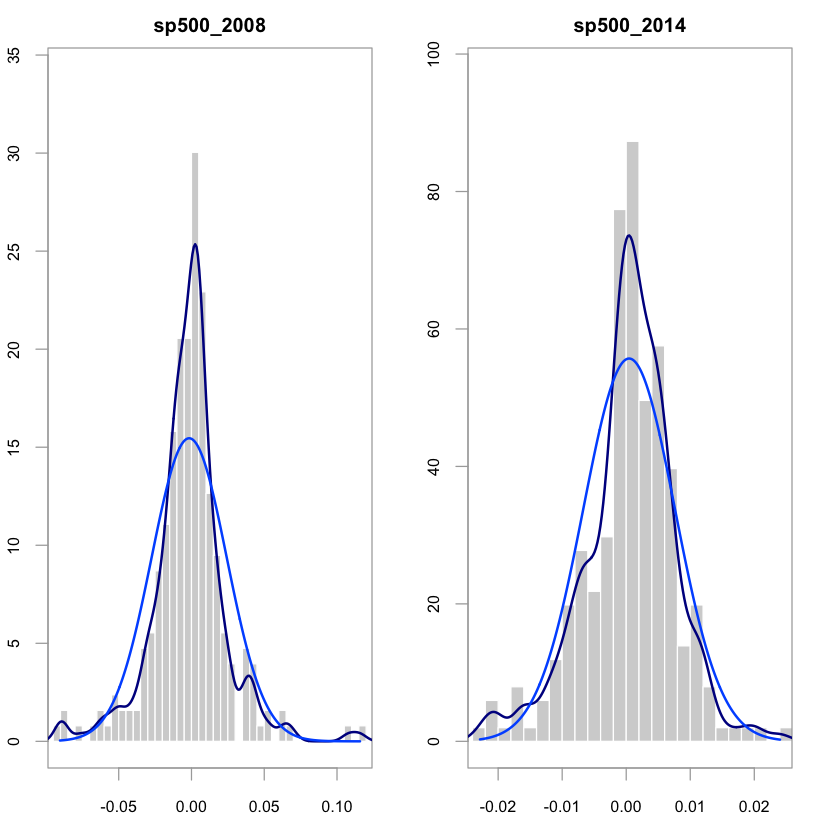

In [25]:
## Subperiod performance analysis and the function window

sp500_returns_dly <- sp500d/lag(sp500d) -1 
sp500_returns_dly <- sp500_returns_dly[-1,] # get rid of first value

# Fill in window for 2008 use function window
sp500_2008 <- window(sp500_returns_dly, start = "2008-01-01", end = "2008-12-31")

# Create window for 2014
sp500_2014 <- window(sp500_returns_dly, start = "2014-01-01", end = "2014-12-31")


# Plotting settings
par(mfrow = c(1, 2) , mar=c(3, 2, 2, 2))
names(sp500_2008) <- "sp500_2008"
names(sp500_2014) <- "sp500_2014"

# Plot histogram of 2008
chart.Histogram(sp500_2008, breaks=40, methods = c("add.density", "add.normal"))

# Plot histogram of 2014
chart.Histogram(sp500_2014, methods = c("add.density", "add.normal"))


[1] -0.838263

[1] -0.8112176

[1] 21.32761

[1] 2.630322

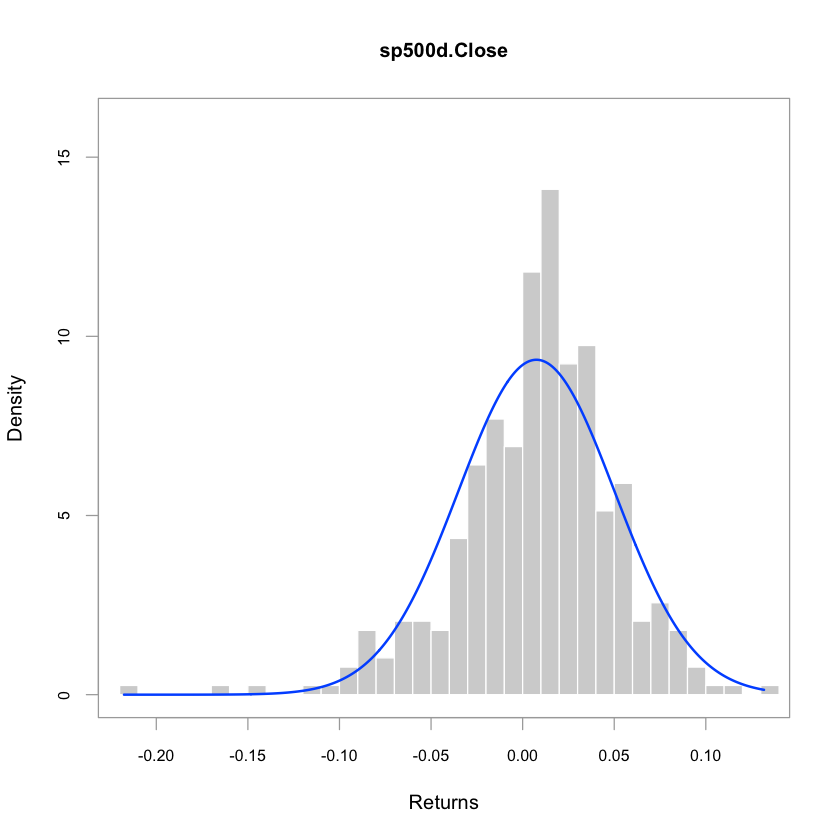

In [142]:
## Detecting non-normality using skewness and kurtosis

#skewness and excess kurtosis performance analytics functions

skewness(sp500_returns_dly)  # negative skewnes (long left tail), positive: long right tail
skewness(sp500_returns)
  

# Compute the excess kurtois 
# for N(0,1) kurtosis is 0.  if kurtosis > 0  we have fatter tails
kurtosis(sp500_returns_dly)
kurtosis(sp500_returns)

chart.Histogram(sp500_returns, methods = c("add.normal") )


In [147]:
##Downside risk measures

#PerformanceAnalytics functions SemiDeviation(), VaR() and ES() for expected shortfall
# Calculate the SemiDeviation
SemiDeviation(sp500_returns)
#explicit formula
semiDevi_explicit <- sd(sp500_returns[sp500_returns < 0])

# Calculate the value at risk
VaR(sp500_returns, p=0.05)  # 5 % perecentile, 95% confidence using "modfied" method
VaR(sp500_returns, p=0.025)  #2.5 % percentile , 97.5% confidence

#explicit formula using gauassian
var_95p <-abs(qnorm(0.05))*sd(sp500_returns) # factor * standard deviation


# Calculate the expected shortfall
ES(sp500_returns, p=0.05) #expected shortfall also called conditional VAR
ES(sp500_returns, p=0.025)



#str(sp500_returns)


,sp500d.Close
Semi-Deviation,0.03265316


,sp500d.Close
VaR,-0.06964675


,sp500d.Close
VaR,-0.09602462


,sp500d.Close
ES,-0.1171486


,sp500d.Close
ES,-0.1661406


From,Trough,To,Depth,Length,To Trough,Recovery
2007-11-01,2009-02-01,2013-03-01,-0.5256,65,16,49
2000-09-01,2002-09-01,2007-05-01,-0.4628,81,25,56
1987-09-01,1987-11-01,1989-07-01,-0.3017,23,3,20
1990-06-01,1990-10-01,1991-02-01,-0.1584,9,5,4
1998-07-01,1998-08-01,1998-11-01,-0.1557,5,2,3


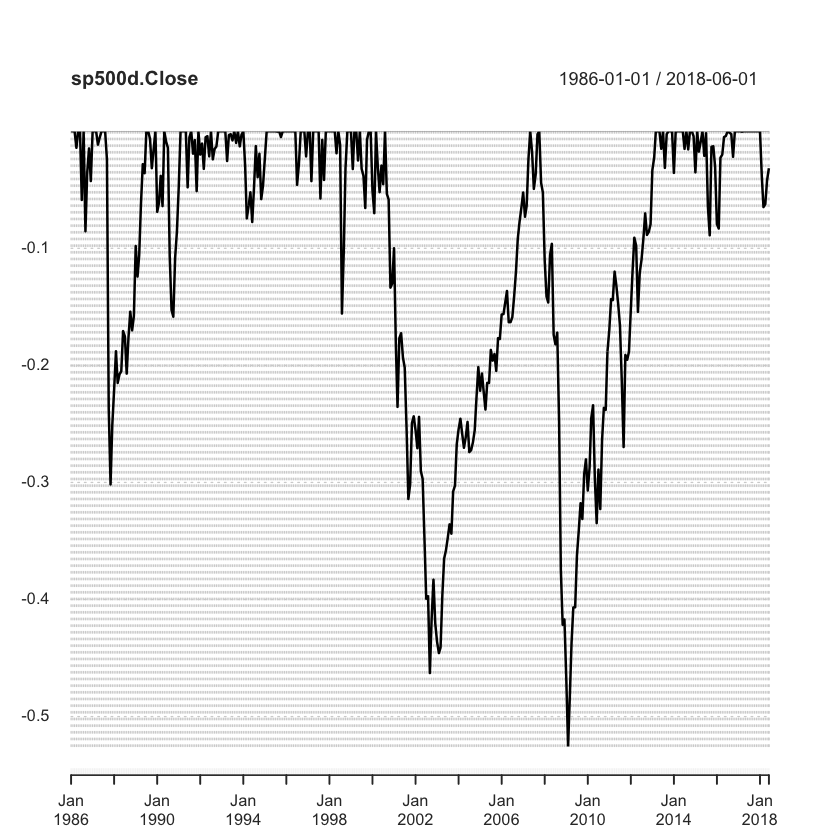

In [149]:
## Drawdowns due to buying high, selling low
index(sp500_returns) <- as.Date(index(sp500_returns))
table.Drawdowns(sp500_returns)
#table.Drawdowns(sp500_returns) # error ? 
chart.Drawdown(sp500_returns)

# Chapter 3 Performance Drivers in the Case of Two Assets


### Future returns are random in nature

![title](img/fut_return_random.png)

#### To optimize portfolio we need  expectations to estimate future returns: Expected return , expected variance

* **Expected Portfolio return** : $E[R_\Pi]=\sum_j w_j E[R_j]$ where $E[R_j]$ is an expected return of the jth asset and $w_j$ is its portfolio weight
* **Portfolio variance** $var(\Pi) = \sum_j w_j^2 var(R_j) + 2\sum_{i>j} w_i w_j cov(R_i,R_j)$

Case: for 2 assets
$$var(\Pi)= \sigma^2 = w_1^2 * var(R_1) + w_2^2 * var(R_2) + 2 * w_1 * w_2 * cov(R_1,R_2)$$

[1] "equity bond portfolio returns serie"


[1] 121   1

[1] "Create a for loop to calculate Sharpe ratios by varying weigt brute force"


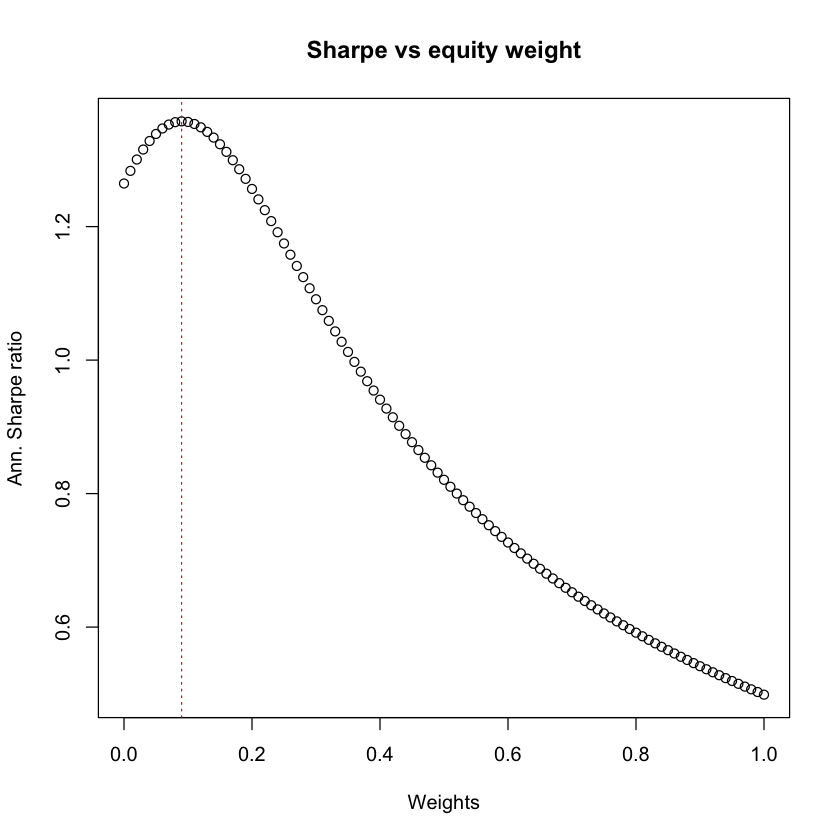

In [153]:
## Driver 2: The choice of portfolio weights

##prepare initial data
#equity_returns  and bond_returns  xts objs 
eq_n<-c(0.0218224207706998,0.0270015619696518,0.0315166890261371,0.0198853208757352,0.0133712504254193,0.0150402629585353,-0.0196174252883055,0.0115888966572408,0.0442957596721727,0.0339200574091789,-0.0146207577580132,-0.0313101741860329,0.0128328148703931,0.0387142553207451,0.013566552689527,-0.0387325120060946,-0.0112607131795039,-0.0604610814407481,-0.0258424999766602,-0.0089423012927472,0.0476622784311049,0.0151165272407163,-0.0835757922283197,-0.00898583618022919,0.0154537235085042,-0.0941735606268089,-0.165186646566528,-0.0696065681022822,0.00979626518637478,-0.0821143357800884,-0.107448957041326,0.0833106825073693,0.0993461726850398,0.0584534626391358,-0.000654933109657141,0.0746057583237929,0.0369396251545973,0.0354571720864503,-0.0192253327088802,0.0616068807663028,0.0191009189729987,-0.0363424281035731,0.0311946867843742,0.0608796441440607,0.0154700528101479,-0.0794545576629583,-0.0517409741247341,0.0683006365566103,-0.04498048170762,0.0895547562726509,0.0382020019024307,0,0.0668522549838624,0.0233001764519494,0.0347373204612935,0.000120161038267064,0.0289614645553882,-0.0112145392349257,-0.016869812369235,-0.020004541096305,-0.0549756677591297,-0.0694206468006466,0.109147093276069,-0.00406371214971124,0.0104482745593952,0.0463745864139229,0.0434054145972269,0.0321637370464258,-0.00667566977471912,-0.06005571781823,0.0405810967386417,0.0118295343526946,0.025052578830836,0.0253509528042861,-0.0181982741871833,0.00565968471034783,0.00893442596469751,0.0511902710722987,0.0127588559560503,0.037971202242846,0.0192123404532487,0.0236097544214926,-0.0133445018989329,0.0516768746518341,-0.029992368010418,0.0316463977235975,0.0463067712719825,0.0296376391373137,0.0259264829912864,-0.0352483094963927,0.0455157816259493,0.008295555975534,0.00695154897705219,0.0232063835155925,0.0206448511000332,-0.0134375790462622,0.0394634977794723,-0.0137962591314623,0.0235508955926029,0.0274719623795567,-0.00253659354496361,-0.0296292400092916,0.0562046276176229,-0.0157057199451436,0.00983390666914907,0.0128561781881484,-0.0203121265350991,0.0225892629137101,-0.0609501622370757,-0.0255159139167823,0.0850596673143691,0.00365511410246633,-0.0172824641885319,-0.0497866641753395,-0.000825946969782443,0.0672661188021606,0.00394121485625987,0.0170114993023756,0.00347585930510119,0.0364713013692521,-0.000829023922316097)
eq_dt<-c('2006-08-30','2006-09-29','2006-10-30','2006-11-29','2006-12-30','2007-01-30','2007-02-27','2007-03-30','2007-04-29','2007-05-30','2007-06-29','2007-07-30','2007-08-30','2007-09-29','2007-10-30','2007-11-29','2007-12-30','2008-01-30','2008-02-28','2008-03-30','2008-04-29','2008-05-30','2008-06-29','2008-07-30','2008-08-30','2008-09-29','2008-10-30','2008-11-29','2008-12-30','2009-01-30','2009-02-27','2009-03-30','2009-04-29','2009-05-30','2009-06-29','2009-07-30','2009-08-30','2009-09-29','2009-10-30','2009-11-29','2009-12-30','2010-01-30','2010-02-27','2010-03-30','2010-04-29','2010-05-30','2010-06-29','2010-07-30','2010-08-30','2010-09-29','2010-10-30','2010-11-29','2010-12-30','2011-01-30','2011-02-27','2011-03-30','2011-04-29','2011-05-30','2011-06-29','2011-07-30','2011-08-30','2011-09-29','2011-10-30','2011-11-29','2011-12-30','2012-01-30','2012-02-28','2012-03-30','2012-04-29','2012-05-30','2012-06-29','2012-07-30','2012-08-30','2012-09-29','2012-10-30','2012-11-29','2012-12-30','2013-01-30','2013-02-27','2013-03-30','2013-04-29','2013-05-30','2013-06-29','2013-07-30','2013-08-30','2013-09-29','2013-10-30','2013-11-29','2013-12-30','2014-01-30','2014-02-27','2014-03-30','2014-04-29','2014-05-30','2014-06-29','2014-07-30','2014-08-30','2014-09-29','2014-10-30','2014-11-29','2014-12-30','2015-01-30','2015-02-27','2015-03-30','2015-04-29','2015-05-30','2015-06-29','2015-07-30','2015-08-30','2015-09-29','2015-10-30','2015-11-29','2015-12-30','2016-01-30','2016-02-28','2016-03-30','2016-04-29','2016-05-30','2016-06-29','2016-07-30','2016-08-30')

#bonds returns ini data
b_n<-c(0.0159096095479581,0.0101152745846473,0.00685746796846698,0.0106191446188812,-0.00600489388043146,-0.000702099519810706,0.0162540801671418,-0.00195104818934322,0.00589751482361489,-0.00917276846285242,-0.00376784387801732,0.0107312313834027,0.0127943481774919,0.00632851410821367,0.0100797469120928,0.0180352271741389,-9.28299637099617e-05,0.0231294554873673,-0.00160053160917606,0.00129699364472979,0.00327583409279808,-0.012652273871695,-0.00184927292607517,0.00393943815911868,0.00741944877129441,-0.0175974387178617,-0.022810556566135,0.0302427495997561,0.0666241590023706,-0.0198656472736346,-0.0105537985688346,0.011029955173584,0.00515227662638362,0.0070969744393834,0.00420762871814251,0.0126904823030987,0.0122024850731302,0.011881846801469,0.00221844524194492,0.0128629386471328,-0.0188122545385108,0.0141486235298611,0.00198425426557902,-6.72205042689944e-05,0.00973255909524129,0.0108243769778948,0.0176873563441726,0.00854719189158426,0.0128676976626685,7.36872979718584e-05,0.00152236475068079,-0.00834921132440847,-0.00675409607673572,-0.000851071713973361,0.0029048041073918,-0.00223038103208073,0.0156748915007339,0.0123983070832603,-0.00445187863681662,0.0168664111443952,0.0152048655806374,0.00770582951268484,0.00126486467049292,-0.00330778380309726,0.0135671644777964,0.00725625282022024,-0.000135402321873257,-0.0057294002240732,0.00905962925180681,0.0107818624339715,-0.000197570039378148,0.0136211165093947,1.47878833400839e-07,0.00266591978008246,-0.000472140820534928,0.00270669528308121,-0.00245224360983298,-0.0062117386185534,0.00590854797107787,0.000985356856707087,0.0096859191672114,-0.020011161736786,-0.0156544711709462,0.00269134830449236,-0.00826373906208189,0.0112063177440667,0.00832639504710686,-0.0025067151067828,-0.00556746899278993,0.0154092055156865,0.0037639248471466,-0.00148039443046855,0.00821677203657845,0.0117905888155525,-0.00057554006614613,-0.00250909984307446,0.0114964194039098,-0.0061484156943441,0.0106407701754874,0.00657024365598957,0.00147613875226527,0.0205229874769748,-0.00894795766385215,0.00374724724407627,-0.00322778376373634,-0.00437406756499081,-0.0107671682414323,0.00862164797436948,-0.00335810022802452,0.00811427433593082,0.000685616708377301,-0.00389068471728005,-0.00191707244573169,0.0124062252900172,0.00887077032125783,0.00874682418737827,0.00254949515872505,0.000135533667371845,0.0193516341479336,0.00544439571530742,-0.00233122035202193)
b_dt<-c('2006-08-30','2006-09-29','2006-10-30','2006-11-29','2006-12-30','2007-01-30','2007-02-27','2007-03-30','2007-04-29','2007-05-30','2007-06-29','2007-07-30','2007-08-30','2007-09-29','2007-10-30','2007-11-29','2007-12-30','2008-01-30','2008-02-28','2008-03-30','2008-04-29','2008-05-30','2008-06-29','2008-07-30','2008-08-30','2008-09-29','2008-10-30','2008-11-29','2008-12-30','2009-01-30','2009-02-27','2009-03-30','2009-04-29','2009-05-30','2009-06-29','2009-07-30','2009-08-30','2009-09-29','2009-10-30','2009-11-29','2009-12-30','2010-01-30','2010-02-27','2010-03-30','2010-04-29','2010-05-30','2010-06-29','2010-07-30','2010-08-30','2010-09-29','2010-10-30','2010-11-29','2010-12-30','2011-01-30','2011-02-27','2011-03-30','2011-04-29','2011-05-30','2011-06-29','2011-07-30','2011-08-30','2011-09-29','2011-10-30','2011-11-29','2011-12-30','2012-01-30','2012-02-28','2012-03-30','2012-04-29','2012-05-30','2012-06-29','2012-07-30','2012-08-30','2012-09-29','2012-10-30','2012-11-29','2012-12-30','2013-01-30','2013-02-27','2013-03-30','2013-04-29','2013-05-30','2013-06-29','2013-07-30','2013-08-30','2013-09-29','2013-10-30','2013-11-29','2013-12-30','2014-01-30','2014-02-27','2014-03-30','2014-04-29','2014-05-30','2014-06-29','2014-07-30','2014-08-30','2014-09-29','2014-10-30','2014-11-29','2014-12-30','2015-01-30','2015-02-27','2015-03-30','2015-04-29','2015-05-30','2015-06-29','2015-07-30','2015-08-30','2015-09-29','2015-10-30','2015-11-29','2015-12-30','2016-01-30','2016-02-28','2016-03-30','2016-04-29','2016-05-30','2016-06-29','2016-07-30','2016-08-30')

returns_equities<-xts(eq_n, order.by=as.Date(eq_dt))
returns_bonds<-xts(b_n, order.by=as.Date(b_dt))
###prepare initial data finished 
print('equity bond portfolio returns serie')
dim(returns_equities)

# Create an iteration grid
grid <- seq(from = 0, to = 1, by = 0.01)

# Initialize an empty vector for sharpe ratios
vsharpe <- rep(NA, times = length(grid) )

### brute-force approach in finding optimal weights 

print('Create a for loop to calculate Sharpe ratios by varying weigt brute force')
for(i in 1:length(grid)) {
	weight <- grid[i]
	preturns <- weight * returns_equities + (1 - weight) * returns_bonds
	vsharpe[i] <- SharpeRatio.annualized(preturns)
}

# Plot weights and Sharpe ratio
plot(grid,vsharpe, xlab = "Weights", ylab= "Ann. Sharpe ratio", main='Sharpe vs equity weight')
abline(v = grid[vsharpe == max(vsharpe)], lty = 3,col='red')



[1] "correlation equities vs bonds (quite close to 0): 0.06211"

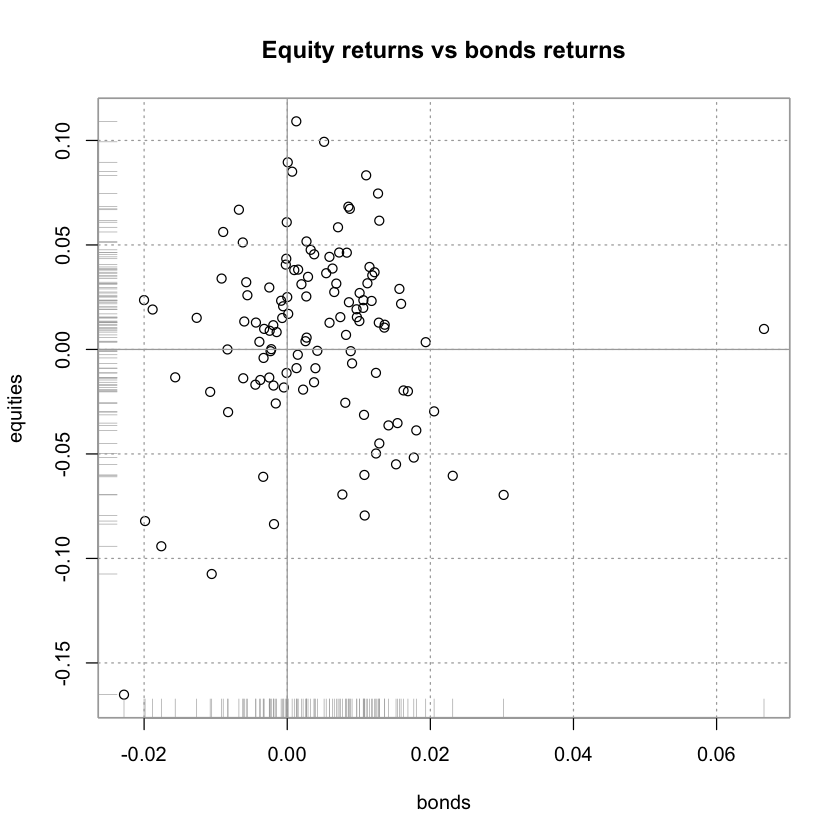

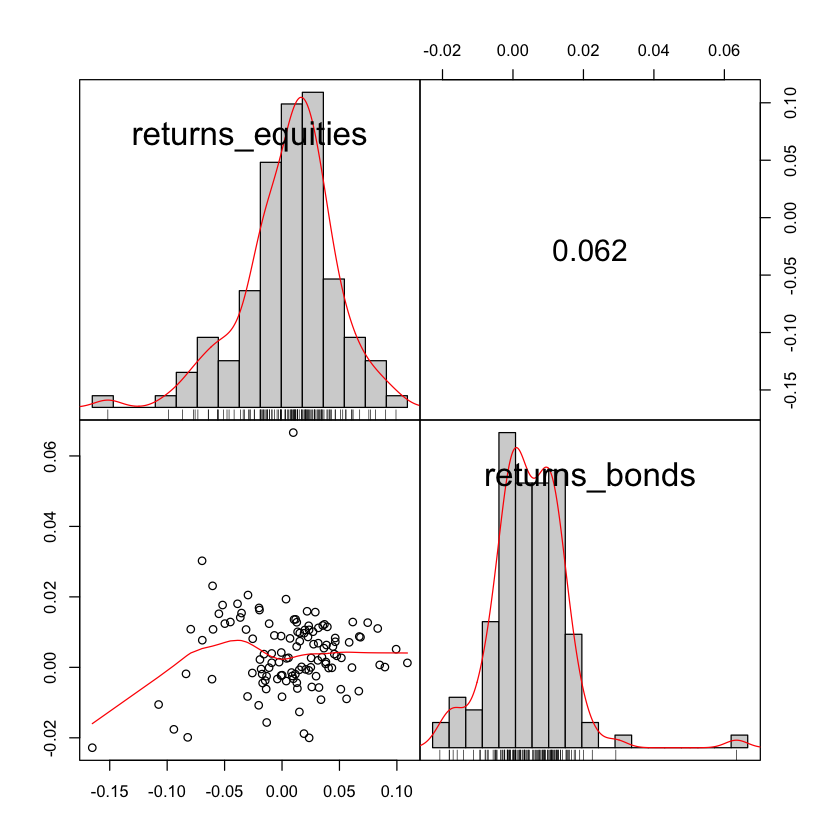

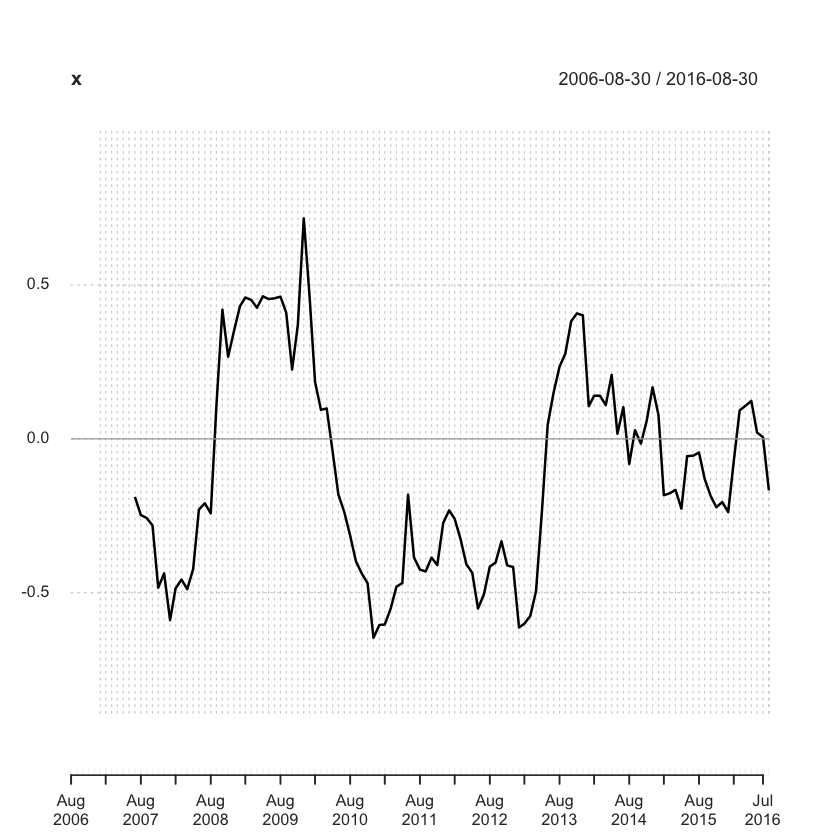

In [160]:
## Interpreting correlation
# Create a scatter plot

# Find the correlation
cr <- cor(returns_equities,returns_bonds)
paste('correlation equities vs bonds (quite close to 0):',formatC(cr))


chart.Scatter(returns_bonds,returns_equities, xlab="bonds", ylab="equities"
              , main="Equity returns vs bonds returns" )


# Merge returns_equities and returns_bonds 
returns <- merge(returns_equities,returns_bonds) #xts obj with 2 columns

# Find and visualize the correlation using chart.Correlation
chart.Correlation(returns, main="equities vs bonds")

##correlation is changing over time
# Visualize the rolling estimates using chart.RollingCorrelation
chart.RollingCorrelation(returns_equities, returns_bonds, width = 24)


## Using Matrix notation for portfolio return and variance

### 4 matrices
* weights **w**
* returns **R**
* expected returns $\boldsymbol{\mu}$
* covariance matrix $\sum$

then in matrix notation
* portfolio return $R_\Pi = \mathbf{w}^{\rm T}\mathbf{R}$
* portfolio expected return $E[R_\Pi] = \mathbf{w}^{\rm T} \boldsymbol{\mu}$
* porfolio variance $var(R_\Pi) = \mathbf{w}^{\rm T} \sum \mathbf{w} $

**We have 4 matrices**
* asset weights(w) (elements: N)
* asset returns(R) (el: N* asset_returns_serie_length)
* expected asset returns ($\mu$)  (el: N)
* covariance between asset returns $\sum$  (el: N*(N-1)/2)

[1] 121   4

[1] "means"
    equities        bonds   realestate  commodities 
 0.007069242  0.004009507  0.008949548 -0.008296070 
[1] "stdev"
   equities       bonds  realestate commodities 
 0.04382029  0.01105763  0.07380896  0.06926739 


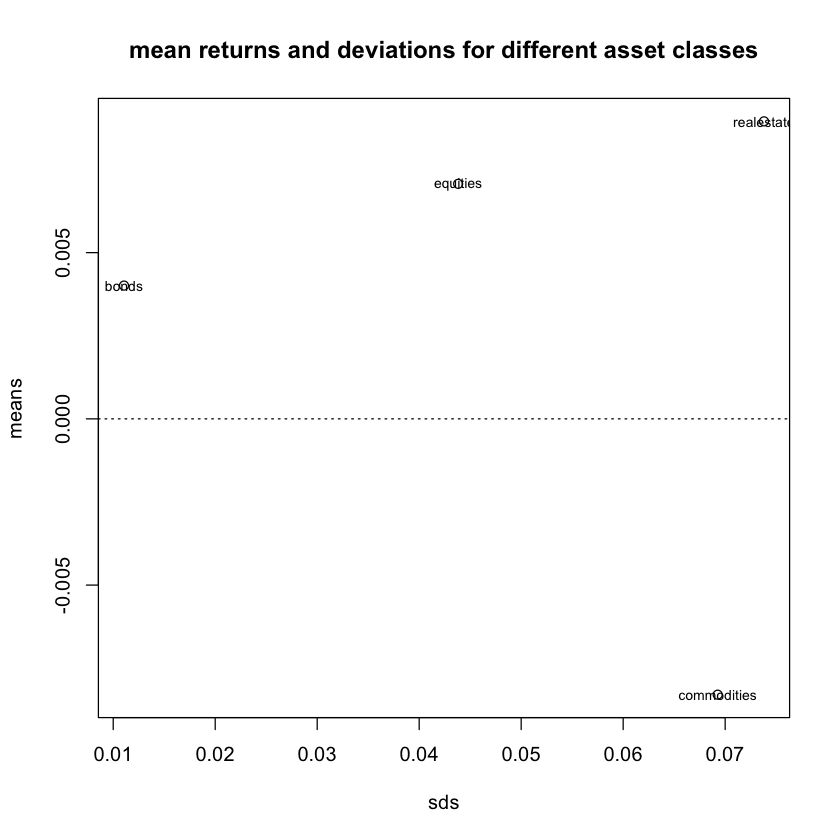

In [161]:
## Making a risk-reward scatter diagram

#prepare initial data returns xts object

r_dt<-c('2006-08-30','2006-09-29','2006-10-30','2006-11-29','2006-12-30','2007-01-30','2007-02-27','2007-03-30','2007-04-29','2007-05-30','2007-06-29','2007-07-30','2007-08-30','2007-09-29','2007-10-30','2007-11-29','2007-12-30','2008-01-30','2008-02-28','2008-03-30','2008-04-29','2008-05-30','2008-06-29','2008-07-30','2008-08-30','2008-09-29','2008-10-30','2008-11-29','2008-12-30','2009-01-30','2009-02-27','2009-03-30','2009-04-29','2009-05-30','2009-06-29','2009-07-30','2009-08-30','2009-09-29','2009-10-30','2009-11-29','2009-12-30','2010-01-30','2010-02-27','2010-03-30','2010-04-29','2010-05-30','2010-06-29','2010-07-30','2010-08-30','2010-09-29','2010-10-30','2010-11-29','2010-12-30','2011-01-30','2011-02-27','2011-03-30','2011-04-29','2011-05-30','2011-06-29','2011-07-30','2011-08-30','2011-09-29','2011-10-30','2011-11-29','2011-12-30','2012-01-30','2012-02-28','2012-03-30','2012-04-29','2012-05-30','2012-06-29','2012-07-30','2012-08-30','2012-09-29','2012-10-30','2012-11-29','2012-12-30','2013-01-30','2013-02-27','2013-03-30','2013-04-29','2013-05-30','2013-06-29','2013-07-30','2013-08-30','2013-09-29','2013-10-30','2013-11-29','2013-12-30','2014-01-30','2014-02-27','2014-03-30','2014-04-29','2014-05-30','2014-06-29','2014-07-30','2014-08-30','2014-09-29','2014-10-30','2014-11-29','2014-12-30','2015-01-30','2015-02-27','2015-03-30','2015-04-29','2015-05-30','2015-06-29','2015-07-30','2015-08-30','2015-09-29','2015-10-30','2015-11-29','2015-12-30','2016-01-30','2016-02-28','2016-03-30','2016-04-29','2016-05-30','2016-06-29','2016-07-30','2016-08-30')
r_eq<-c(0.0218224207706998,0.0270015619696518,0.0315166890261374,0.019885320875735,0.0133712504254193,0.0150402629585356,-0.0196174252883055,0.0115888966572411,0.0442957596721727,0.0339200574091789,-0.0146207577580131,-0.0313101741860328,0.0128328148703931,0.0387142553207451,0.0135665526895268,-0.0387325120060946,-0.0112607131795039,-0.060461081440748,-0.0258424999766601,-0.0089423012927472,0.0476622784311049,0.0151165272407163,-0.0835757922283198,-0.00898583618022908,0.0154537235085042,-0.0941735606268089,-0.165186646566528,-0.0696065681022822,0.00979626518637478,-0.0821143357800884,-0.107448957041326,0.0833106825073693,0.0993461726850398,0.0584534626391358,-0.00065493310965703,0.0746057583237929,0.0369396251545973,0.0354571720864503,-0.0192253327088803,0.0616068807663028,0.0191009189729985,-0.0363424281035731,0.0311946867843742,0.0608796441440607,0.0154700528101479,-0.0794545576629583,-0.051740974124734,0.0683006365566103,-0.04498048170762,0.0895547562726509,0.0382020019024307,0,0.0668522549838624,0.0233001764519494,0.0347373204612933,0.000120161038267286,0.0289614645553882,-0.0112145392349257,-0.016869812369235,-0.0200045410963049,-0.0549756677591295,-0.0694206468006466,0.109147093276069,-0.00406371214971124,0.010448274559395,0.0463745864139229,0.0434054145972269,0.0321637370464258,-0.00667566977471912,-0.0600557178182299,0.0405810967386417,0.0118295343526946,0.0250525788308358,0.0253509528042861,-0.0181982741871833,0.00565968471034783,0.00893442596469751,0.0511902710722987,0.0127588559560503,0.037971202242846,0.0192123404532487,0.0236097544214926,-0.0133445018989328,0.0516768746518339,-0.029992368010418,0.0316463977235975,0.0463067712719825,0.0296376391373137,0.0259264829912864,-0.0352483094963927,0.045515781625949,0.008295555975534,0.00695154897705219,0.0232063835155925,0.0206448511000334,-0.0134375790462623,0.0394634977794726,-0.0137962591314623,0.0235508955926029,0.0274719623795567,-0.00253659354496361,-0.0296292400092916,0.0562046276176229,-0.0157057199451435,0.00983390666914907,0.0128561781881484,-0.0203121265350991,0.0225892629137101,-0.0609501622370757,-0.0255159139167823,0.0850596673143693,0.00365511410246633,-0.0172824641885319,-0.0497866641753396,-0.000825946969782443,0.0672661188021608,0.00394121485625987,0.0170114993023756,0.00347585930510119,0.0364713013692521,-0.000829023922316208)
r_fi<-c(0.0159096095479581,0.0101152745846473,0.00685746796846698,0.0106191446188815,-0.00600489388043168,-0.000702099519810595,0.0162540801671418,-0.00195104818934322,0.00589751482361511,-0.00917276846285242,-0.00376784387801732,0.0107312313834027,0.0127943481774919,0.00632851410821345,0.010079746912093,0.0180352271741389,-9.28299637099617e-05,0.0231294554873673,-0.00160053160917595,0.00129699364472979,0.0032758340927983,-0.0126522738716951,-0.00184927292607517,0.00393943815911868,0.00741944877129463,-0.0175974387178617,-0.022810556566135,0.0302427495997561,0.0666241590023706,-0.0198656472736347,-0.0105537985688346,0.011029955173584,0.00515227662638362,0.0070969744393834,0.00420762871814251,0.0126904823030987,0.0122024850731302,0.011881846801469,0.00221844524194492,0.0128629386471328,-0.0188122545385108,0.0141486235298611,0.00198425426557902,-6.72205042691054e-05,0.00973255909524129,0.0108243769778948,0.0176873563441726,0.00854719189158448,0.0128676976626685,7.36872979718584e-05,0.00152236475068079,-0.00834921132440847,-0.00675409607673561,-0.000851071713973361,0.00290480410739202,-0.00223038103208084,0.0156748915007339,0.0123983070832603,-0.00445187863681662,0.0168664111443955,0.0152048655806374,0.00770582951268506,0.00126486467049292,-0.00330778380309715,0.0135671644777962,0.00725625282022024,-0.000135402321873368,-0.00572940022407309,0.00905962925180681,0.0107818624339713,-0.000197570039378148,0.0136211165093947,1.47878833400839e-07,0.00266591978008246,-0.000472140820534928,0.00270669528308121,-0.00245224360983298,-0.0062117386185534,0.00590854797107787,0.000985356856707087,0.0096859191672114,-0.0200111617367861,-0.0156544711709461,0.00269134830449236,-0.00826373906208178,0.0112063177440667,0.00832639504710686,-0.0025067151067828,-0.00556746899279004,0.0154092055156865,0.00376392484714683,-0.00148039443046855,0.00821677203657845,0.0117905888155525,-0.00057554006614613,-0.00250909984307435,0.0114964194039098,-0.00614841569434399,0.0106407701754871,0.00657024365598957,0.00147613875226527,0.020522987476975,-0.00894795766385215,0.00374724724407627,-0.00322778376373634,-0.00437406756499081,-0.0107671682414323,0.00862164797436948,-0.00335810022802441,0.00811427433593104,0.000685616708377301,-0.00389068471727994,-0.0019170724457318,0.0124062252900174,0.00887077032125783,0.00874682418737827,0.00254949515872482,0.000135533667371845,0.0193516341479338,0.00544439571530742,-0.00233122035202205)
r_re<-c(0.034843251648397,0.019659068021493,0.0602776831563721,0.0478125023966189,-0.0184256285044455,0.0877922259579178,-0.0269818930119569,-0.0207492164455139,-0.00126022217846777,-0.00378558988141142,-0.0900773293997673,-0.0825934270803435,0.0674452515165964,0.0391726002948358,0.0209907596812906,-0.0947093498674502,-0.0541298206062277,-0.00780995037966092,-0.0318136923090589,0.0648528556115169,0.0637922881939033,-0.00210935744141194,-0.106153981558385,0.0311537702515958,0.0237383517022862,-0.00123726407521707,-0.317269728815346,-0.227174136331548,0.167109296140377,-0.175308708161198,-0.205256162714022,0.0364142877005951,0.306836881533382,0.0261582348284126,-0.0319702843411697,0.107707210517668,0.143231475267391,0.0659276016347681,-0.044632099957671,0.0656565098894357,0.0738678408225832,-0.0552079563349819,0.0558315812544719,0.101867610900601,0.0715017084491105,-0.0533461265588403,-0.0521227437296425,0.0959345916714029,-0.0127575958268249,0.0447071056083681,0.0474270744343495,-0.0185151620577422,0.0455070042235346,0.0325085621175438,0.0470527373469138,-0.0161066989927319,0.0574653394060896,0.0137473299542425,-0.0329926160199757,0.0156406772781059,-0.0561926882227866,-0.108419346271301,0.142913376012864,-0.0380117203405003,0.0485035135852079,0.0637931102332439,-0.0115072715624736,0.0520015412993962,0.0285938613871584,-0.0450588187689203,0.0551706668493004,0.0200213597589294,-0.00014977488340906,-0.0186319737232439,-0.00908113927141374,-0.00264055884913539,0.037227378109111,0.0373860281378269,0.0121592620964079,0.0287216370524359,0.0673471937975116,-0.0597768319349344,-0.0198188582005041,0.00902207332542249,-0.0698009630247098,0.0348185569636461,0.0452070894178465,-0.052509726766765,0.00101866148841778,0.0427509498098917,0.0506536404842242,0.00496889162387371,0.0328518138636746,0.0239923736123573,0.0113414159816581,0.000801781640850319,0.0304404897903112,-0.0604056275058695,0.0993736913632277,0.020002496294109,0.0190392948493998,0.0685185587009038,-0.0367417636925558,0.017318988678716,-0.0584746896742036,-0.00302339814019303,-0.0466862738544387,0.0577051182503603,-0.0629114402964204,0.0305959573588288,0.0575853502479322,-0.00625855642656692,0.0183098975757408,-0.0343660455662933,-0.00363686574954547,0.10465410632807,-0.0235082839246491,0.0224855360901794,0.069284390241231,0.0426299810948709,0.00216337492544016)
r_cmd<-c(-0.0713300295566502,-0.107362632986152,-0.0254338008081769,0.049999975609756,-0.0692218134546299,-0.0254554779136511,0.0371319087613806,0.0246913580246912,0.00457828915662661,-0.01175337039466,0.0313107031235267,0.0477758979630081,-0.0318958221024258,0.0944315589063367,0.0599958049606024,-0.00459999999999994,0.0596745428973275,-0.00455066346034627,0.112571428571428,-0.00941617873651768,0.0819218271358135,0.0846646033439171,0.103240085324298,-0.133226584796338,-0.0748498382873866,-0.10437824205094,-0.296654262019596,-0.148784381606765,-0.111766473510291,-0.103460359893032,-0.0612085769980508,0.0456810631229236,-0.015488443208896,0.215006042153851,-0.00232410350849588,0.00732116496909052,0.00429468120251064,-0.0236842105263158,0.0481806266846361,0.0128575694999176,0.00983814662012072,-0.0810810810810813,0.0591654924760603,0.00613500181256055,0.0314505455712453,-0.135967614684742,0.000720237666546719,0.0575745931063478,-0.0547804714113805,0.0802735392270144,0.0289903032322558,0.0123057322637867,0.0908508637236085,0.0310851044624694,0.0264505119453926,0.0349126627874756,0.0425703101777943,-0.0685670022744478,-0.0595533223049355,0.0316622095672177,-0.0170502704475778,-0.127204365423533,0.102683004217191,0.0150195249318257,-0.0239716181127074,0.0239539114614922,0.062185342019544,-0.0303875113015756,-0.00345023011645285,-0.127813040969417,0.00694677472709238,0.0588041702101125,0.0716723859757991,-0.0214244927207732,-0.0402366875809671,0.0160295935890751,-0.00515770646716363,0.0457456527677447,-0.0510352857674167,0.0110633370908626,-0.0489361976330579,-0.0153404277615714,-0.00032456995535779,0.0564935732627783,0.0310386591567715,-0.0348732648248364,-0.0145151632330093,-0.00470072077718575,0.0135390113350127,-0.0220565089175678,0.0479670266836085,-0.000606274591920197,0.0100090382162863,-0.00510504519834976,0.0238453660173448,-0.0566037179601249,-0.015625,-0.0606349206349207,-0.0594795539033458,-0.10097017606899,-0.137490007993605,-0.0871176552363299,0.059390859929398,-0.0656445105105649,0.109230717948718,-0.0217290347540008,-0.00236290170132325,-0.141639026923779,0.00275932655853617,-0.0599889928453496,-0.000585480093676649,-0.0913884007029877,-0.0825274016763379,-0.0527055516514405,-0.0207715133531158,0.0446969696969695,0.103698332124728,0.0131406044678055,0.00648508430609596,-0.100515463917526,-0.0207736389684814)
dt<-data.frame(equities=r_eq, bonds=r_fi, realestate=r_re, commodities=r_cmd)
returns<-xts(dt, order.by=as.Date(r_dt))
## prepare data finished

dim(returns)
#Create a vector of returns 
means <- apply(returns, MARGIN=2, FUN="mean") #margin=2 = compute column-wise
  
# Create a vector of standard deviation
sds <- apply(returns, MARGIN=2, FUN="sd")


# Create a scatter plot
plot(sds,means, main="mean returns and deviations for different asset classes")
text(sds, means, labels = colnames(returns), cex = 0.7)
abline(h = 0, lty = 3)

print('means')
print(means)
print('stdev')
print(sds)

In [162]:
## the covariance matrix


# Create a matrix with variances on the diagonal
diag_cov<-diag(sds^2)  ## diagonal matrix 

# Create a covariance matrix of returns
cov_matrix<-cov(returns)   # cov() computes variance-covariance matrix
cov_matrix

# Create a correlation matrix of returns
cor_matrix <- cor(returns) # cor() from stats computes correlation 
cor_matrix
# Verify covariances equal the product of standard deviations and correlation
all.equal(cov_matrix[1,2], cor_matrix[1,2] * sds[1] * sds[2])


,equities,bonds,realestate,commodities
equities,1.920218e-03,3.009761e-05,0.0024063778,1.510994e-03
bonds,3.009761e-05,1.222713e-04,0.0002632232,-6.860821e-05
realestate,2.406378e-03,2.632232e-04,0.0054477625,1.329142e-03
commodities,1.510994e-03,-6.860821e-05,0.0013291423,4.797972e-03


,equities,bonds,realestate,commodities
equities,1.00000000,0.06211472,0.7440112,0.49780426
bonds,0.06211472,1.00000000,0.3225172,-0.08957463
realestate,0.74401117,0.32251718,1.0000000,0.25997618
commodities,0.49780426,-0.08957463,0.2599762,1.00000000


[1] "names for current but not for target"

In [172]:
## Matrix-based calculation of portfolio mean and variance

#assign the following weights in prtf to equities, bonds, realestate and commodities
weights <- c(0.4, 0.4, 0.1, 0.1)

# Create a weight vector w
w<-as.matrix(weights)

# Create a vector of returns
mu<-as.matrix(means)

# Calculate portfolio mean monthly returns
r_prtf<- t(w) %*% mu
paste('porfolio return: ', formatC(r_prtf))
# Calculate portfolio variance
var_prtf <- t(mu)%*% cov_matrix %*% mu
vola_prtf <- sqrt(var_prtf)
paste("porffolio volatility:",formatC(vola_prtf))

[1] "porfolio return:  0.004497"

[1] "porffolio volatility: 0.0009053"

## Risk budgeting

**Risk budgeting** is a contribution of volatilites of asset classes to the total portfolio volatility

Portfolio Volatility $\sum_i^N RC_i$ where $RC_i$ is ith asset's volatility contribution. 
$$ RC_i = \frac{w_i\left(\sum \mathbf{w} \right)_i  }{ \sqrt{ \mathbf{w}^{\rm T} \sum \mathbf{w} }} $$

,weights,perc vol contrib
equities,0.4,0.59004087
bonds,0.4,0.04048648
realestate,0.1,0.21972154
commodities,0.1,0.14975111


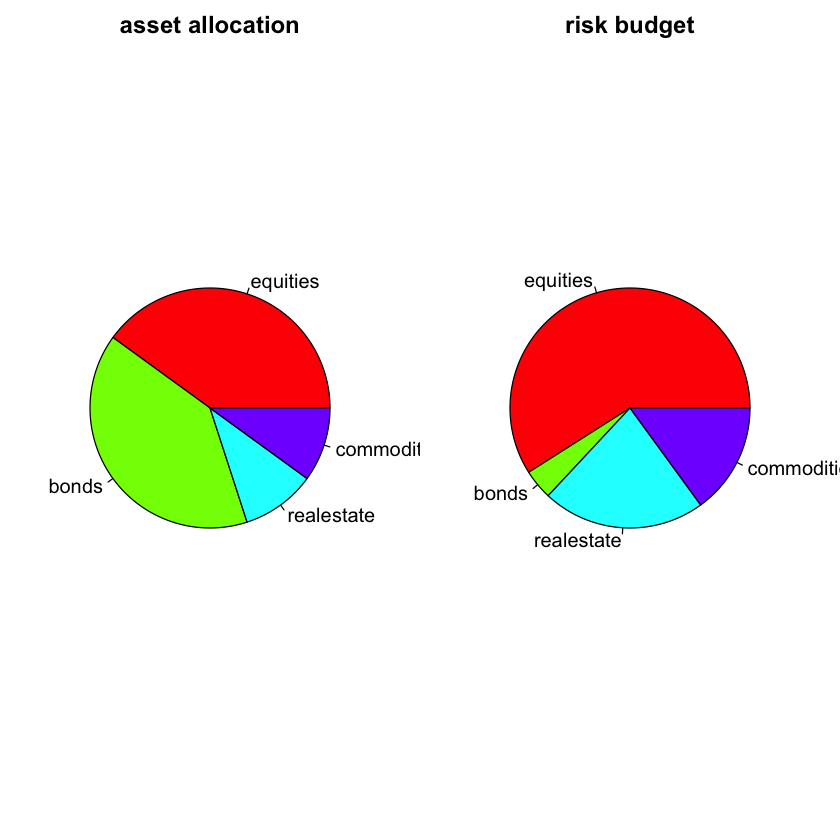

In [173]:
## Who did it?
# i.e. which asset and how contributes to volatility

#we use the same weights vector weights <- c(0.4, 0.4, 0.1, 0.1)

# !NB using StdDev() func  from Performance Analytics
vol_budget <- StdDev(returns, portfolio_method = "component", weights = weights)

# Make a table of weights and risk contribution
weights_percrisk <-cbind(weights, vol_budget$pct_contrib_StdDev)

colnames(weights_percrisk) <- c("weights", "perc vol contrib")

# Print the table
weights_percrisk
lbls<-colnames(returns)
par(mfrow = c(1, 2) , mar=c(3, 2, 2, 2))
pie(weights, labels=lbls, col=rainbow(length(lbls)), main="asset allocation")
pie(vol_budget$pct_contrib_StdDev,labels=lbls, col=rainbow(length(lbls)), main="risk budget")


# Chapter 4 Optimizing portfolio

### find best ways to:

![title](img/prtf_opt_goals.png)

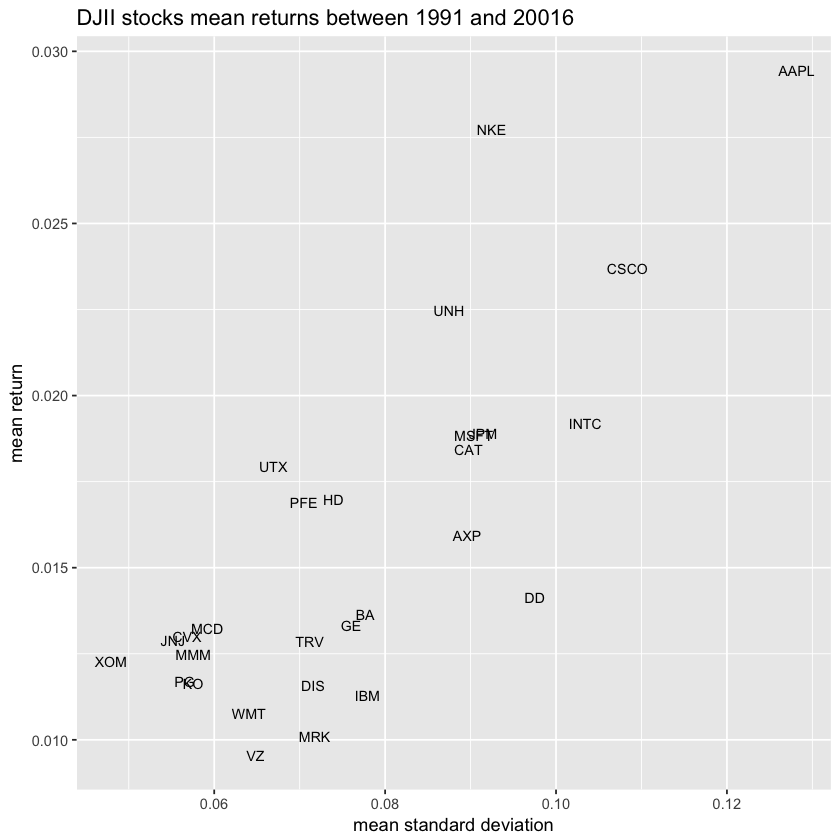

In [174]:
## mean-variance based investing in DJIA stocks

require(ggplot2)

## current contents of dow jones index source 2017-01-10   http://money.cnn.com/data/dow30/
djii_all<-c("MMM", "AXP", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "DIS", "DD", "XOM", "GE"
            ,"GS", "HD", "IBM", "INTC","JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE", "PFE", "PG"
            ,"TRV", "UTX", "UNH", "VZ", "V", "WMT")

#reading monthly prices of djii  from 1990-12  to 2016-12
# two tickers GS and V  did not have a value at 1990-12 so they are purged  so
djii<-c("MMM", "AXP", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "DIS", "DD", "XOM", "GE"
            ,"HD", "IBM", "INTC","JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE", "PFE", "PG"
            ,"TRV", "UTX", "UNH", "VZ", "WMT")


# check R script dldsav_data_yahoo.R  which downloads data from yahoo converts it to monthly 
#and writes csv file djii_prices.csv
dj_prices <- read.zoo("djii_prices.csv", format= "%Y-%m-%d", header=TRUE)

#returns from prices
dj_returns<-Return.calculate(dj_prices)
dj_returns<-dj_returns[-1,] #remove first NA line


#Create a vector of mean returns for all tickers
dj_means <- apply(dj_returns, MARGIN=2, FUN="mean")

# Create a vector of mean standard deviation
dj_sds <- apply(dj_returns, MARGIN=2, FUN="sd")

df<-data.frame(dj_sds, dj_means)

print(
ggplot(df, aes(x=dj_sds, y=dj_means)) + 
  geom_text(aes(label=djii),size=3) +
 ggtitle("DJII stocks mean returns between 1991 and 20016") +
 labs(y="mean return", x="mean standard deviation")
)
### as we see  different stocks have significantly different mean returns and mean deviation
# but in general we see a positive linear correlation between returns and standard deviations

[1] 329  28

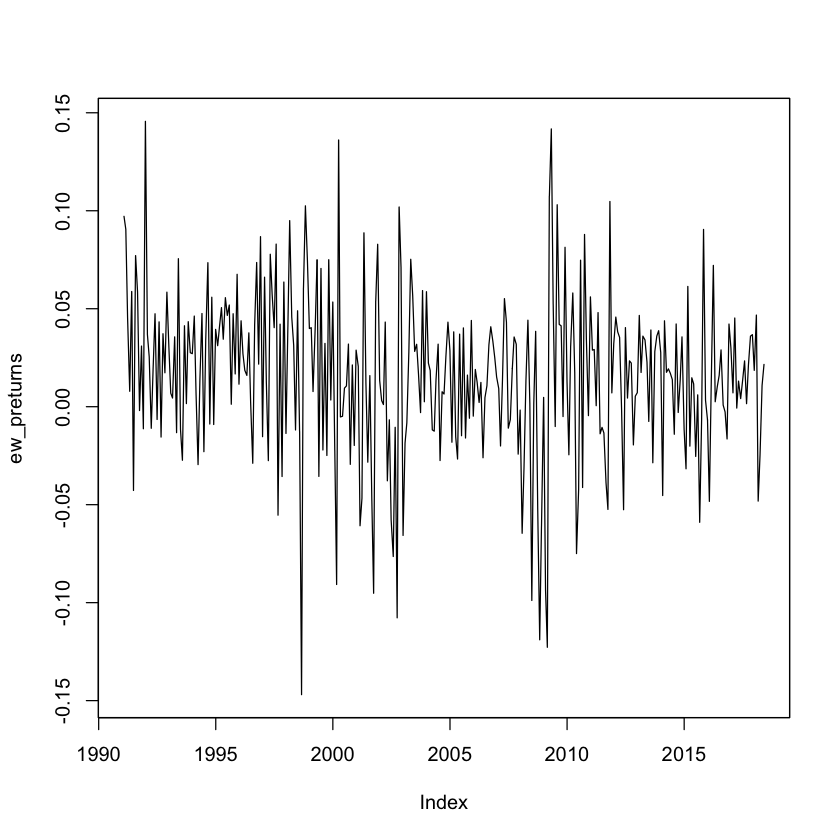

In [175]:
##Exploring monthly returns of the 30 DJIA stocks 
# we can also plot a time series of monthly mean returns if equially weighted djii portfolio

# Investigate the dimensions of returns
#dim(dj_returns)

# Create a vector of row means
ew_preturns<-rowMeans(dj_returns,1) #same as apply(returns,MARGIN=1, FUN="mean")

# Cast the numeric vector back to an xts object
ew_preturns <- xts(ew_preturns, order.by = time(dj_returns))

# Plot ew_preturns
plot.zoo(ew_preturns)



In [178]:
## Finding the mean-variance efficient portfolio
require(tseries)
# Create an optimized portfolio of returns #1 arg means equally weighted portfolio
opt <- portfolio.optim(dj_returns)
#opt$pw  are optimized weights,  opt$pm = prtf mean return opt$ps  is prtf sd

#optimized portfolio with  a return target
pf_mean <- portfolio.optim(dj_returns, pm = mean(dj_returns))

# Create portfolio with target return 10% greater than average returns
pf_10plus <- portfolio.optim(dj_returns, pm = 1.1 * mean(dj_returns))

# Print the standard deviations of both portfolios
paste("sd of optimized portfolio with a mean return trget",formatC(pf_mean$ps))
paste("sd of optimized portfolio with a 1.1 * of mean return turget",formatC(pf_10plus$ps))
paste("mean return target is:",formatC(mean(dj_returns)))


# Calculate the proportion increase in standard deviation
paste("the proportional increase in standard deviation: (for 10% increase in return)",
      formatC((pf_10plus$ps - pf_mean$ps) / (pf_mean$ps)))


[1] "sd of optimized portfolio with a mean return trget 0.03583"

[1] "sd of optimized portfolio with a 1.1 * of mean return turget 0.03809"

[1] "mean return target is: 0.01575"

[1] "the proportional increase in standard deviation: (for 10% increase in return) 0.06288"

In [180]:
## Imposing weight constraints
# Create vectors of maximum weights
max_weights1 <- rep(1, ncol(dj_returns))
max_weights2 <- rep(0.1, ncol(dj_returns))
max_weights3 <- rep(0.05, ncol(dj_returns))
# Create optimal portfolio with 3 levels of weight constrins
opt1 <- portfolio.optim(dj_returns, reshigh = max_weights1)
opt2 <- portfolio.optim(dj_returns, reshigh = max_weights2)
opt3 <- portfolio.optim(dj_returns, reshigh = max_weights3)

# check how many assets have a weight that is greater than 1% for each portfolio
sum(opt1$pw > .01)
sum(opt2$pw > .01)
sum(opt3$pw > .01)
#therefore the stronger the weight constraint, the less concentrated is the portfolio

paste('3 portfolio volatilies opt1,opt2, op3:')
formatC(opt1$ps)
formatC(opt2$ps)
formatC(opt3$ps)

[1] 14

[1] 15

[1] 24

[1] "3 portfolio volatilies opt1,opt2, op3:"

[1] "0.03583"

[1] "0.03635"

[1] "0.03848"

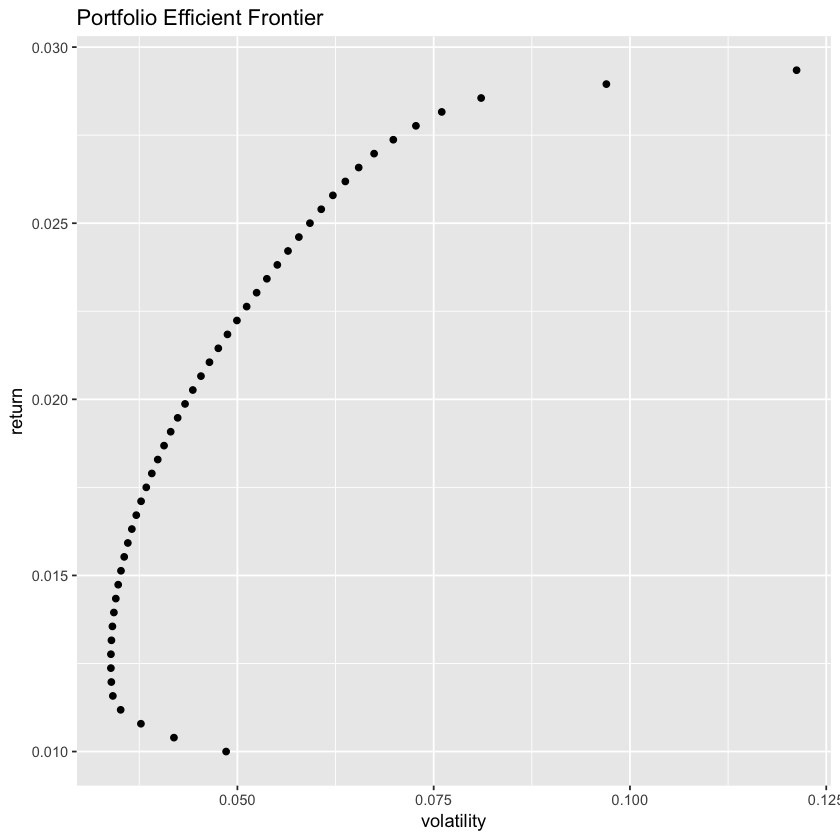

In [183]:
## Computing the efficient frontier using a grid of target returns

# Calculate each stocks mean returns
stockmu<-colMeans(dj_returns)

grid_size<-50
prtf_size<-length(dj_returns[1,]) #28
# Create a grid of target values upper limit = max stock's return - 1 bp.
grid <- seq(from = 0.01, to = max(stockmu)-0.0001, length.out = grid_size)

# Create empty vectors to store means and deviations
vpm <- rep(NA, length=grid_size )
vpsd<- rep(NA, length=grid_size )

# Create an empty matrix to store prtf weights for each grid row
mweights <- matrix(NA, grid_size, prtf_size)


##### !!! Create iteration loop ##########
for(i in 1:length(grid)) {
  opt <- portfolio.optim(x = dj_returns, pm = grid[i]) # return target grows monotonically
  vpm[i] <- opt$pm   #return
  vpsd[i] <- opt$ps  #volastrdsfd
  mweights[i, ] <- opt$pw
}

#plot the efficient frontier, optimized portfolio returns vs its volatilities
df<-data.frame(vpsd, vpm)

print(
  ggplot(df, aes(x=vpsd, y=vpm)) + 
    geom_point() +
    ggtitle("Portfolio Efficient Frontier") +
    labs(y="return", x="volatility")
)


### Below we find weights for a min variance portfolio and max sharpe portfolio on efficient frontier

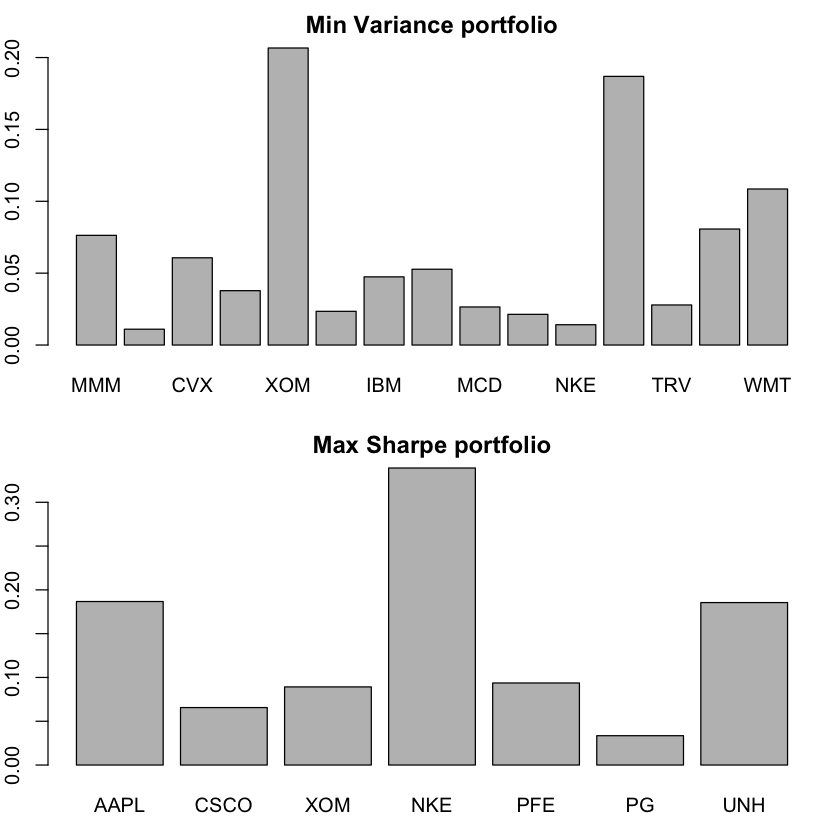

In [189]:
##The minimum variance and maximum Sharpe ratio portfolio

# Create weights_minvar as the portfolio with the least risk
weights_minvar <- mweights[vpsd == min(vpsd), ] # constraint is a minimum portfoio variance

# Calculate the Sharpe ratio
riskfree_rt<-0.0075
vsr <- (vpm - riskfree_rt) / vpsd #50 sharpes for each grid value

# Create weights_max_sr as the portfolio with the maximum Sharpe ratio
weights_max_sr <- mweights[vsr == max(vsr),] #constraint: max prtf sharpe ratio

# Create barplot of weights of min variance  and max sharpe ratio portfolio
## show only weights which are larget then 1%
par(mfrow = c(2, 1), mar = c(3, 2, 2, 1))
barplot(weights_minvar[weights_minvar > 0.01]
        ,names.arg=colnames(dj_returns)[which(weights_minvar > 0.01)]
        ,main="Min Variance portfolio")

barplot(weights_max_sr[weights_max_sr > 0.01]
       ,names.arg=colnames(dj_returns)[which(weights_max_sr > 0.01)]
       ,main="Max Sharpe portfolio")
 


### In-Sample vs Out-of-Sample evaluation

![title](img/estim_error.png)

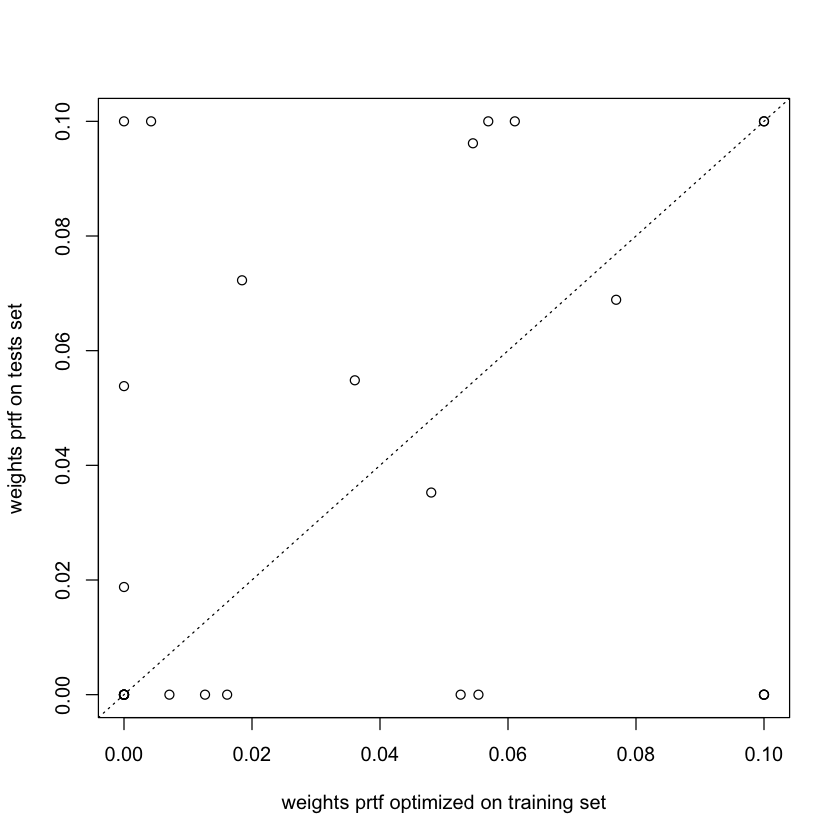

In [196]:
##Split-sample evaluation
##training set of returns
returns_estim <- window(dj_returns, start = "1991-01-01", end = "2004-12-31")

# Create returns_eval
# test set of returns
returns_eval <- window(dj_returns, start = "2005-01-01", end = "2016-12-31")

#weights constraint
max_weights <- rep(0.10, ncol(dj_returns))

# Create portfolio with estimation sample (training set)
pf_estim <- portfolio.optim(returns_estim, reshigh = max_weights)


#Create portfolio with evaluation sample (test set)
pf_eval <- portfolio.optim(returns_eval, reshigh = max_weights )

# Create a scatter plot of portfolio weights from training set and test sets
# if weights are the same they should be on a diagonal line
plot(pf_estim$pw, pf_eval$pw, xlab="weights prtf optimized on training set"
                ,ylab="weights prtf on tests set")
abline(a = 0, b = 1, lty = 3)
#the plot shows they are not!! otherwise they will be on y=x line

In [198]:
## Out of sample performance evaluation

# Create returns_pf_estim (training set of dj_returns data) (produces an xts with a prtf return)
returns_pf_estim <- Return.portfolio(returns_estim, pf_estim$pw, rebalance_on = "months")


# Create returns_pf_eval  (test set of dj_returns data,
#NB! using weights found on training set)
returns_pf_eval <- Return.portfolio(returns_eval, pf_estim$pw, rebalance_on = "months")


# Print a table for your estimation portfolio (training set)
table.AnnualizedReturns(returns_pf_estim)

# Print a table for your evaluation portfolio (test set)
table.AnnualizedReturns(returns_pf_eval)

#as you can see params on training set are expectedly much better then on test set!!


,portfolio.returns
Annualized Return,0.2681
Annualized Std Dev,0.1314
Annualized Sharpe (Rf=0%),2.0410


,portfolio.returns
Annualized Return,0.1131
Annualized Std Dev,0.1370
Annualized Sharpe (Rf=0%),0.8254


In [ ]:
## read the aticle on portfolio optimization with deoptim